In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import matplotlib.patches as mpatches  # Import mpatches for legend

In [2]:
rec100_dict = {
    'mse': {
        'Classical SHAP': [0.318308, 0.189149, 0.314469, 0.194131, 0.194131],
        'QRC Embedding': [0.203, 0.183, 0.229, 0.162, 0.218],
        'QRC Linear Embedding': [0.227, 0.189, 0.213, 0.173, 0.245],
        'Gaussian RBF': [0.311, 0.262, 0.360, 0.225, 0.225],
        'Classical Reservoir': []
    },
    'mae': {
        'Classical SHAP': [0.436, 0.306, 0.491, 0.320, 0.320],
        'QRC Embedding': [0.329, 0.296, 0.422, 0.300, 0.349],
        'QRC Linear Embedding': [0.350, 0.299, 0.407, 0.320, 0.376],
        'Gaussian RBF': [0.416, 0.350, 0.507, 0.360, 0.360]
    },
    'r2': {
        'Classical SHAP': [0.117, 0.632, 0.136, 0.165, 0.165],
        'QRC Embedding': [0.459, 0.643, 0.370, 0.304, 0.480],
        'QRC Linear Embedding': [0.398, 0.632, 0.415, 0.255,0.416],
        'Gaussian RBF': [0.136, 0.489, 0.011, 0.034, 0.034] 
    }
}

In [3]:
rec200_dict = {
    'mse': {
        'Classical SHAP': [0.202, 0.163, 0.157, 0.133, 0.095],
        'QRC Embedding': [0.182, 0.120, 0.116, 0.072, 0.214],
        'QRC Linear Embedding': [0.180, 0.121, 0.137, 0.095, 0.189],
        'Gaussian RBF': [0.268, 0.173, 0.192, 0.189, 0.128]
    },
    'mae': {
        'Classical SHAP': [0.341, 0.282, 0.330, 0.287, 0.228],
        'QRC Embedding': [0.303, 0.256, 0.266, 0.197, 0.284],
        'QRC Linear Embedding': [0.314, 0.246, 0.301523, 0.213, 0.274],
        'Gaussian RBF': [0.420, 0.324, 0.353, 0.370, 0.273]
    },
    'r2': {
        'Classical SHAP': [0.518, 0.373, 0.463, 0.547, 0.817],
        'QRC Embedding': [0.298, 0.599, 0.604, 0.861, 0.411],
        'QRC Linear Embedding': [0.304, 0.595, 0.531, 0.817, 0.480],
        'Gaussian RBF': [0.362, 0.332, 0.347, 0.357, 0.755]
    }
}

In [4]:
rec800_dict = {
    'mse': {
        'Classical SHAP': [0.148352, 0.100491, 0.205513, 0.092565,	0.128139],
        'QRC Embedding': [0.153238, 0.098902, 0.19931, 0.127009, 0.19931],
        'QRC Linear Embedding': [0.144717, 0.095226, 0.18732, 0.156923, 0.240952],
        'Gaussian RBF': [0.183562, 0.122924, 0.225575, 0.12131, 0.154119]
    },
    'mae': {
        'Classical SHAP': [0.275254, 0.237367, 0.332333, 0.226361, 0.274465],
        'QRC Embedding': [0.273188, 0.230618, 0.306707, 0.259589, 0.306707],
        'QRC Linear Embedding': [0.271386, 0.225179, 0.303066, 0.261067, 0.394509],
        'Gaussian RBF': [0.319385, 0.283724, 0.360758, 0.264738, 0.314505]
    },
    'r2': {
        'Classical SHAP': [0.592624, 0.733488, 0.50536, 0.734005, 0.634013],
        'QRC Embedding': [0.579208, 0.695777, 0.52029, 0.627497, 0.52029],
        'QRC Linear Embedding': [0.602606, 0.707086, 0.549147, 0.552388, 0.557041],
        'Gaussian RBF': [0.495939, 0.673993, 0.457074, 0.651402, 0.559812]
    }
}

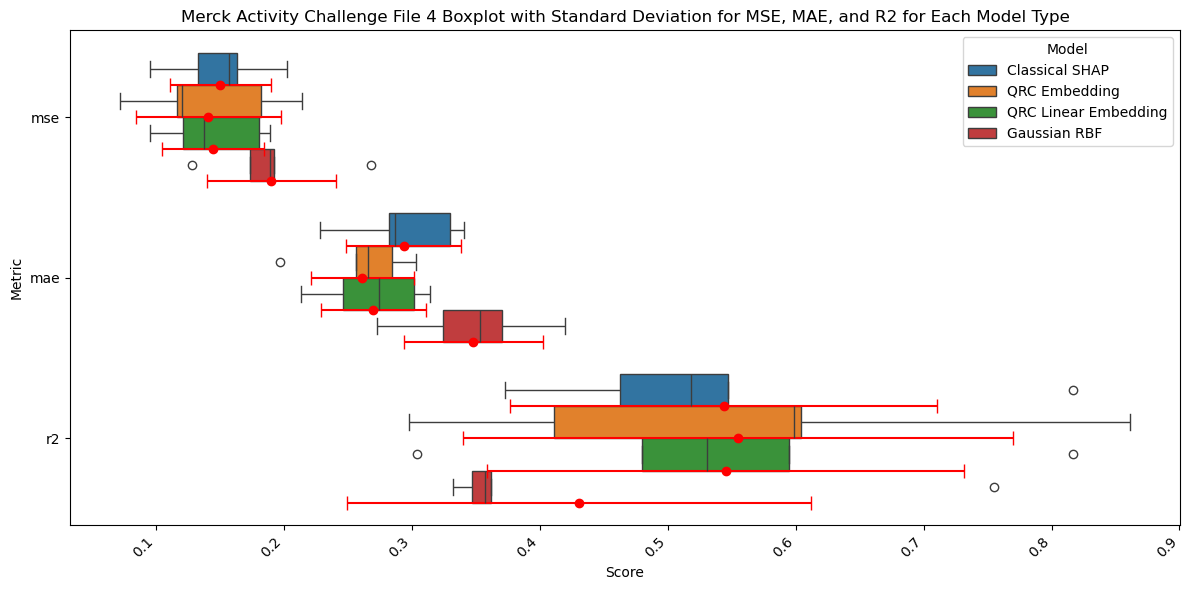

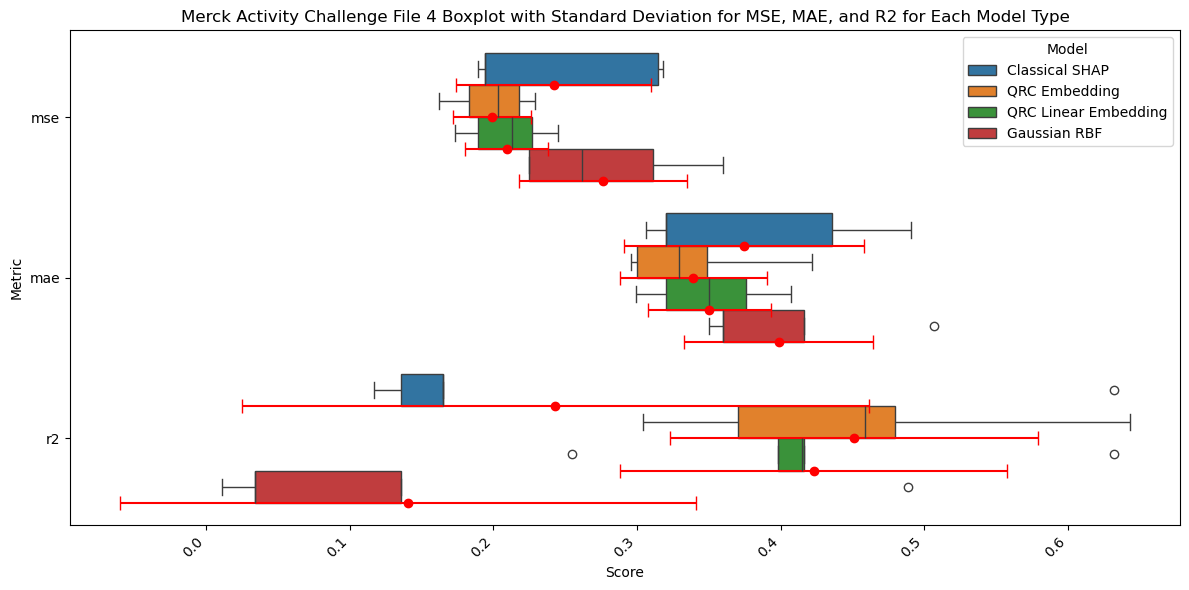

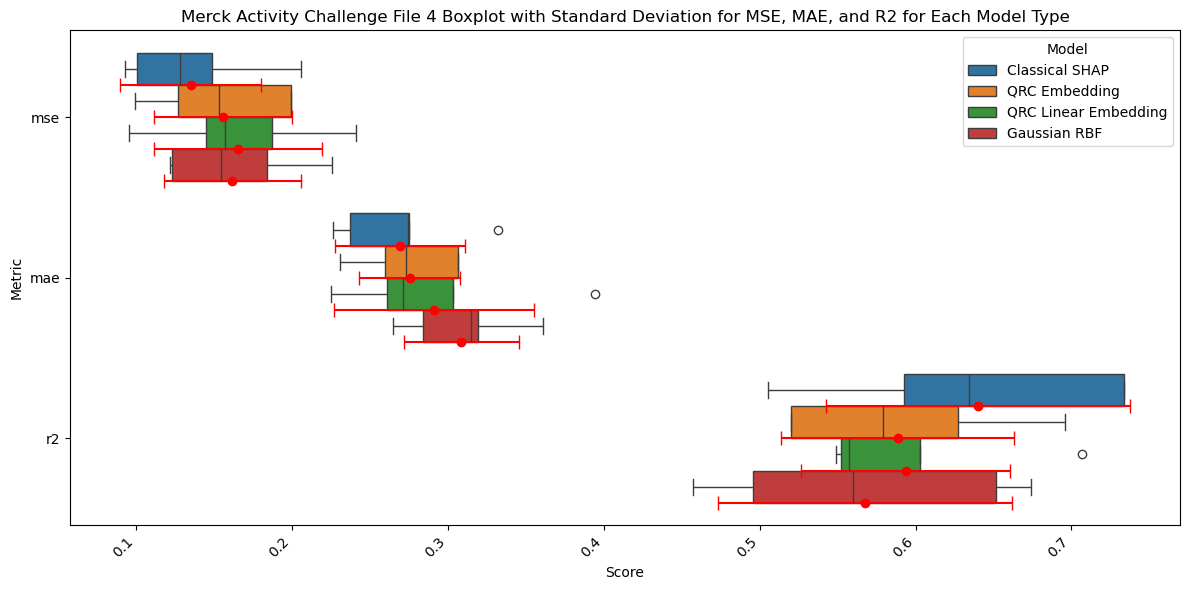

In [5]:
def create_boxplot_nested(data_dict, filename):
    # Convert the nested dictionary to a DataFrame
    data = []
    for metric, values in data_dict.items():
        for model, scores in values.items():
            for score in scores:
                data.append({'Model': model, 'Score': score, 'Metric': metric})
    
    df = pd.DataFrame(data)
    
    # Create the boxplot
    plt.figure(figsize=(12, 6))
    sns.boxplot(y='Metric', x='Score', hue='Model', data=df)
    
    # Calculate means and standard deviations
    means = df.groupby(['Metric', 'Model'])['Score'].mean().reset_index()
    stds = df.groupby(['Metric', 'Model'])['Score'].std().reset_index()
    
    # Add error bars
    for i in range(len(means)):
        metric = means.loc[i, 'Metric']
        model = means.loc[i, 'Model']
        mean = means.loc[i, 'Score']
        std = stds.loc[i, 'Score']
        
        # Find the position of the boxplot
        x = mean
        y = df['Metric'].unique().tolist().index(metric) + (df['Model'].unique().tolist().index(model) * 0.2) - 0.2
        
        plt.errorbar(x, y, xerr=std, fmt='o', color='red', capsize=5)
    
    plt.title('Merck Activity Challenge File 4 Boxplot with Standard Deviation for MSE, MAE, and R2 for Each Model Type')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()
    plt.close()

# Example usage
create_boxplot_nested(rec200_dict, 'recs200models.jpg')
create_boxplot_nested(rec100_dict, 'recs100models.jpg')
create_boxplot_nested(rec800_dict, 'recs800models.jpg')

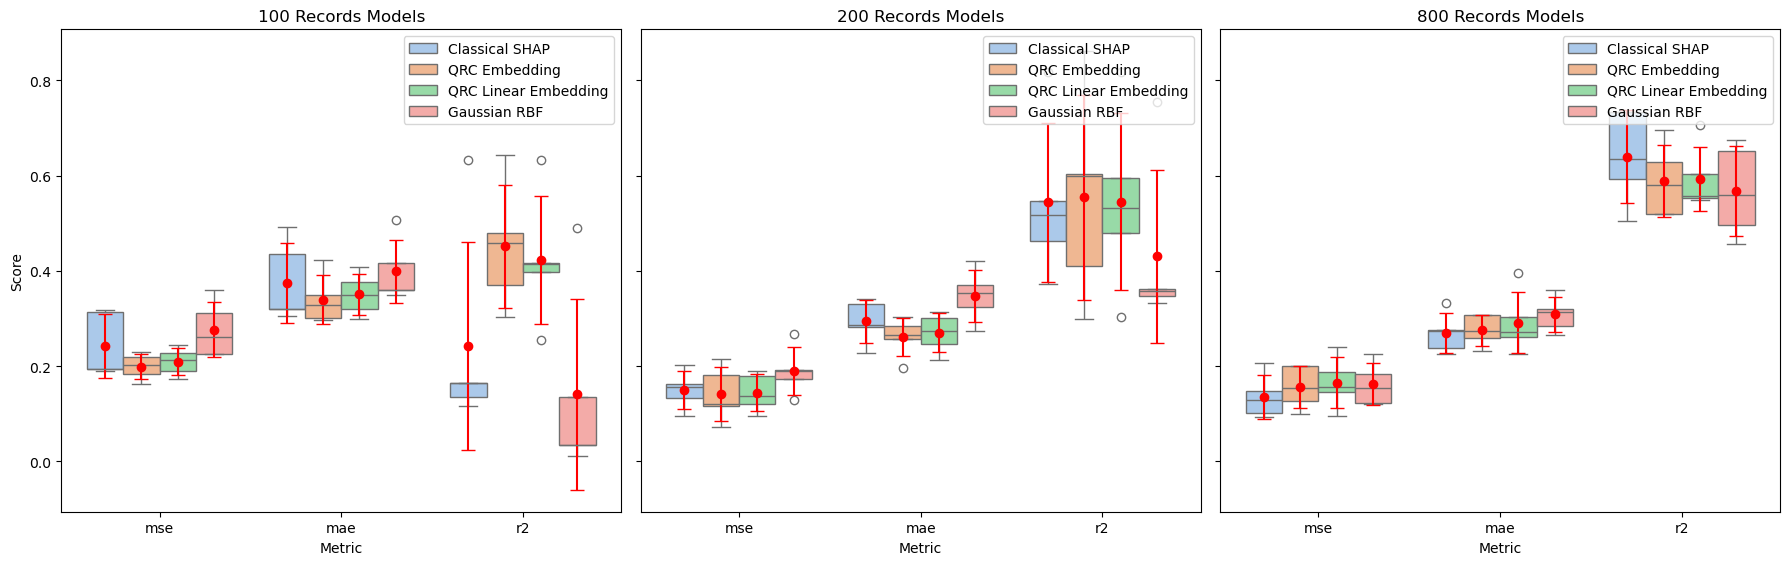

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def boxplot_recolored(rec100_dict, rec200_dict, rec800_dict, filename):
    # Combine the data from all dictionaries into a single DataFrame
    data = []
    for source, data_dict in zip(['rec100', 'rec200', 'rec800'], [rec100_dict, rec200_dict, rec800_dict]):
        for metric, values in data_dict.items():
            for model, scores in values.items():
                for score in scores:
                    data.append({'Model': model, 'Score': score, 'Metric': metric, 'Source': source})
    
    df = pd.DataFrame(data)
    
    # Create the boxplot with subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    sources = ['rec100', 'rec200', 'rec800']
    
    for ax, source in zip(axes, sources):
        sns.boxplot(x='Metric', y='Score', hue='Model', data=df[df['Source'] == source], ax=ax, palette='pastel')
        
        # Extract the numeric part from the source name for the title
        numeric_part = ''.join(filter(str.isdigit, source))
        ax.set_title(f'{numeric_part} Records Models')
        ax.set_xlabel('Metric')
        ax.set_ylabel('Score')
        
        # Calculate means and standard deviations for error bars
        means = df[df['Source'] == source].groupby(['Metric', 'Model'])['Score'].mean().reset_index()
        stds = df[df['Source'] == source].groupby(['Metric', 'Model'])['Score'].std().reset_index()
        
        # Determine positions for error bars
        metrics = df['Metric'].unique()
        models = df['Model'].unique()
        n_metrics = len(metrics)
        n_models = len(models)
        spacing = 0.8 / n_models  # Assuming seaborn's default spacing
        
        for metric in metrics:
            metric_index = np.where(metrics == metric)[0][0]
            for model_index, model in enumerate(models):
                if ((means['Metric'] == metric) & (means['Model'] == model)).any():
                    mean = means[(means['Metric'] == metric) & (means['Model'] == model)]['Score'].values[0]
                    std = stds[(stds['Metric'] == metric) & (stds['Model'] == model)]['Score'].values[0]
                    # Calculate position for error bar
                    position = metric_index + (model_index + 0.5) * spacing - 0.4
                    ax.errorbar(position, mean, yerr=std, fmt='o', color='red', capsize=5)
        
        ax.legend(loc='upper right')
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig(filename)
    plt.show()
    plt.close()


boxplot_recolored(rec100_dict, rec200_dict, rec800_dict, 'centered_error_bars.jpg')

In [7]:
# create mean values for MSE with Std deviation.
#Line represents each model type, x axis is the # of records.
# y axis is MSE score.
# Error bars / std deviation around data points.


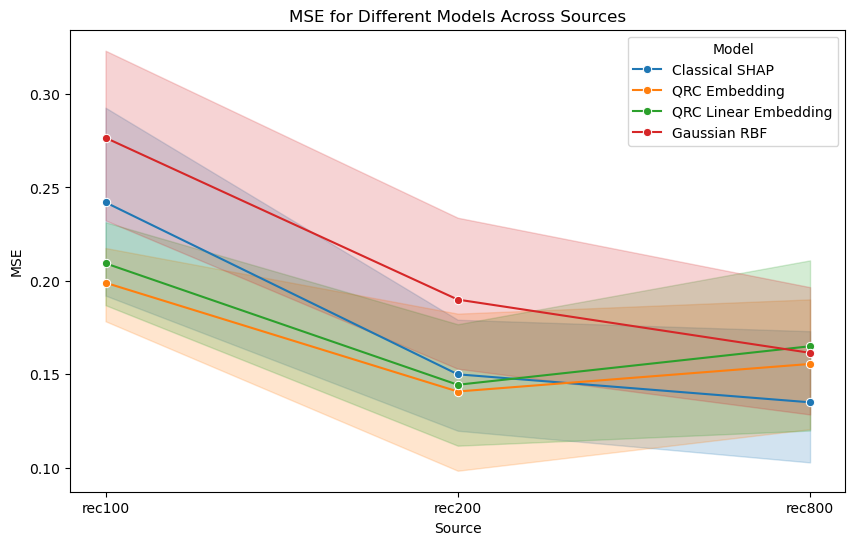

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the data from all dictionaries into a single DataFrame
data = []
for source, data_dict in zip(['rec100', 'rec200', 'rec800'], [rec100_dict, rec200_dict, rec800_dict]):
    for model, scores in data_dict['mse'].items():
        for score in scores:
            data.append({'Model': model, 'MSE': score, 'Source': source})

df = pd.DataFrame(data)

# Create the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Source', y='MSE', hue='Model', marker='o')

# Set the title and labels
plt.title('MSE for Different Models Across Sources')
plt.xlabel('Source')
plt.ylabel('MSE')

# Show the plot
plt.show()

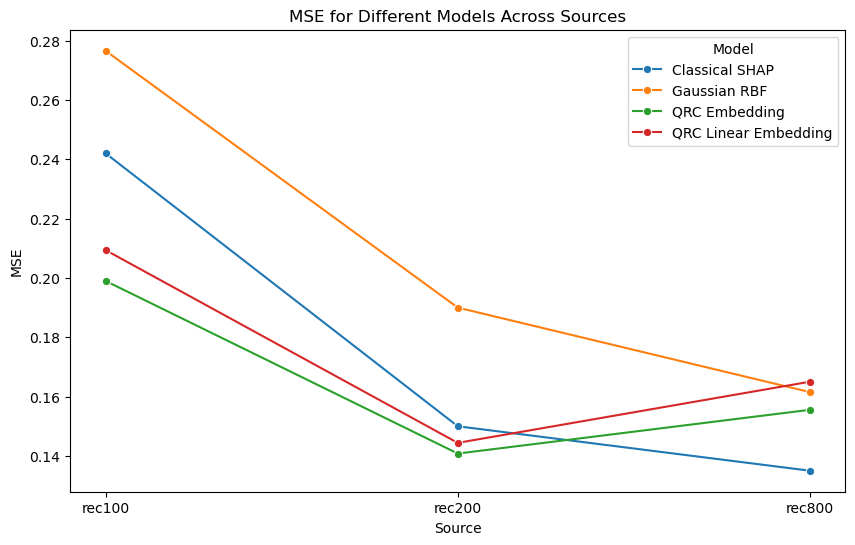

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the data from all dictionaries into a single DataFrame
data = []
for source, data_dict in zip(['rec100', 'rec200', 'rec800'], [rec100_dict, rec200_dict, rec800_dict]):
    for model, scores in data_dict['mse'].items():
        for score in scores:
            data.append({'Model': model, 'MSE': score, 'Source': source})

df = pd.DataFrame(data)

# Calculate means for the line chart
means = df.groupby(['Source', 'Model'])['MSE'].mean().reset_index()

# Create the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=means, x='Source', y='MSE', hue='Model', marker='o')

# Set the title and labels
plt.title('MSE for Different Models Across Sources')
plt.xlabel('Source')
plt.ylabel('MSE')

# Show the plot
plt.show()

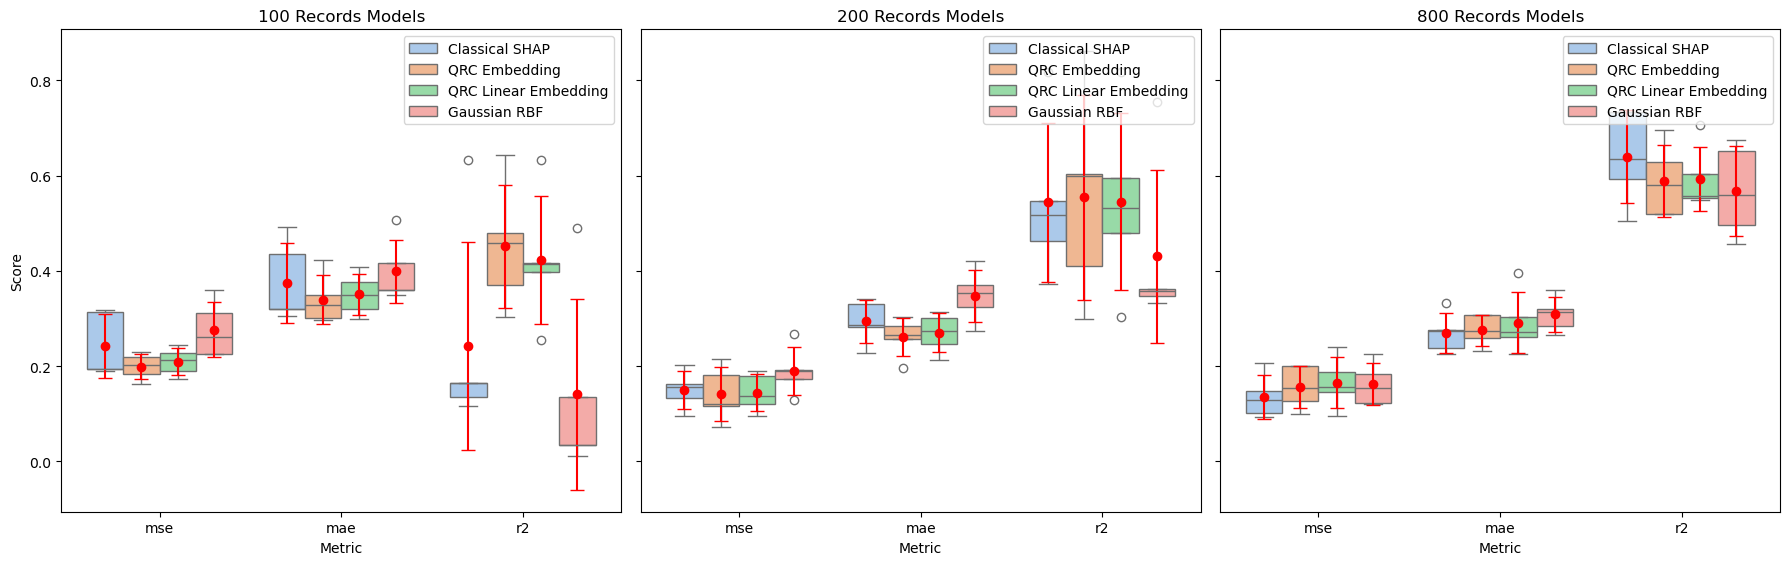

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def boxplot_recolored(rec100_dict, rec200_dict, rec800_dict, filename):
    # Combine the data from all dictionaries into a single DataFrame
    data = []
    for source, data_dict in zip(['rec100', 'rec200', 'rec800'], [rec100_dict, rec200_dict, rec800_dict]):
        for metric, values in data_dict.items():
            for model, scores in values.items():
                for score in scores:
                    data.append({'Model': model, 'Score': score, 'Metric': metric, 'Source': source})
    
    df = pd.DataFrame(data)
    
    # Create the boxplot with subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    sources = ['rec100', 'rec200', 'rec800']
    
    for ax, source in zip(axes, sources):
        sns.boxplot(x='Metric', y='Score', hue='Model', data=df[df['Source'] == source], ax=ax, palette='pastel')
        
        # Extract the numeric part from the source name for the title
        numeric_part = ''.join(filter(str.isdigit, source))
        ax.set_title(f'{numeric_part} Records Models')
        ax.set_xlabel('Metric')
        ax.set_ylabel('Score')
        
        # Calculate means and standard deviations for error bars
        means = df[df['Source'] == source].groupby(['Metric', 'Model'])['Score'].mean().reset_index()
        stds = df[df['Source'] == source].groupby(['Metric', 'Model'])['Score'].std().reset_index()
        
        # Determine positions for error bars
        metrics = df['Metric'].unique()
        models = df['Model'].unique()
        n_metrics = len(metrics)
        n_models = len(models)
        spacing = 0.8 / n_models  # Assuming seaborn's default spacing
        
        for metric in metrics:
            metric_index = np.where(metrics == metric)[0][0]
            for model_index, model in enumerate(models):
                if ((means['Metric'] == metric) & (means['Model'] == model)).any():
                    mean = means[(means['Metric'] == metric) & (means['Model'] == model)]['Score'].values[0]
                    std = stds[(stds['Metric'] == metric) & (stds['Model'] == model)]['Score'].values[0]
                    # Calculate position for error bar
                    position = metric_index + (model_index + 0.5) * spacing - 0.4
                    ax.errorbar(position, mean, yerr=std, fmt='o', color='red', capsize=5)
        
        ax.legend(loc='upper right')
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig(filename)
    plt.show()
    plt.close()


boxplot_recolored(rec100_dict, rec200_dict, rec800_dict, 'centered_error_bars.jpg')

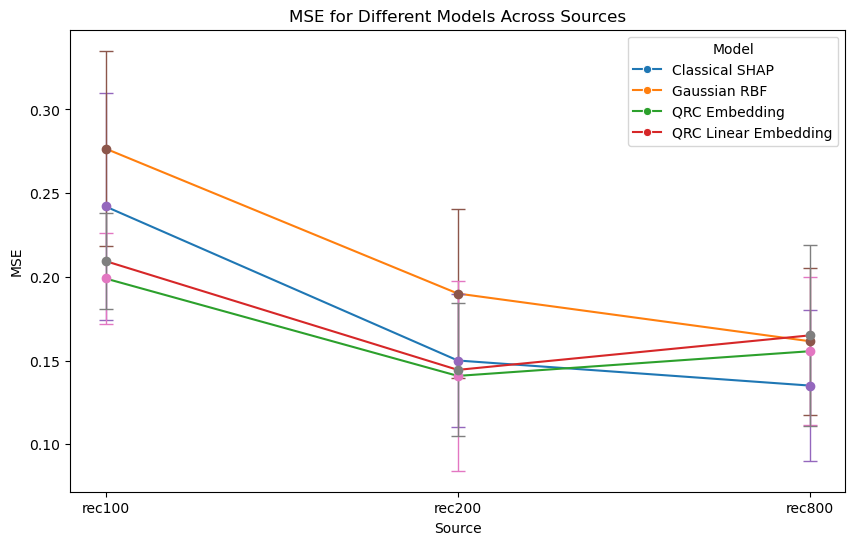

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the data from all dictionaries into a single DataFrame
data = []
for source, data_dict in zip(['rec100', 'rec200', 'rec800'], [rec100_dict, rec200_dict, rec800_dict]):
    for model, scores in data_dict['mse'].items():
        for score in scores:
            data.append({'Model': model, 'MSE': score, 'Source': source})

df = pd.DataFrame(data)

# Calculate means and standard deviations for error bars
means = df.groupby(['Source', 'Model'])['MSE'].mean().reset_index()
stds = df.groupby(['Source', 'Model'])['MSE'].std().reset_index()

# Create the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=means, x='Source', y='MSE', hue='Model', marker='o')

# Add vertical error bars
for model in means['Model'].unique():
    model_means = means[means['Model'] == model]
    model_stds = stds[stds['Model'] == model]
    plt.errorbar(model_means['Source'], model_means['MSE'], yerr=model_stds['MSE'], fmt='o', capsize=5, elinewidth=1, markeredgewidth=1)

# Set the title and labels
plt.title('MSE for Different Models Across Sources')
plt.xlabel('Source')
plt.ylabel('MSE')

# Show the plot
plt.show()

# Actfile 4

/tmp/ipykernel_2464272/744984904.py:30: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  barplot = sns.barplot(data=means, x='Source', y='MSE_mean', hue='Model', hue_order=model_order, palette=pastel_palette, errorbar=None)


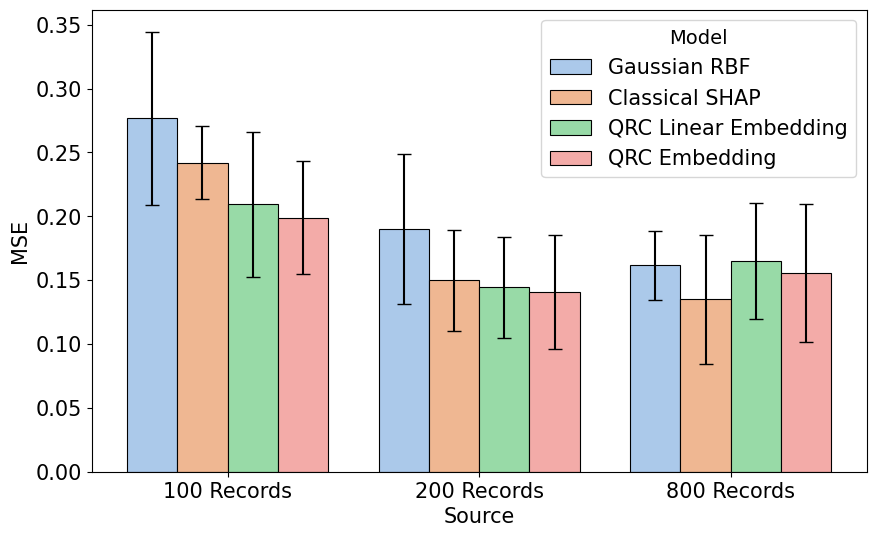

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Combine the data from all dictionaries into a single DataFrame
data = []
for source, data_dict in zip(['rec100', 'rec200', 'rec800'], [rec100_dict, rec200_dict, rec800_dict]):
    for model, scores in data_dict['mse'].items():
        for score in scores:
            data.append({'Model': model, 'MSE': score, 'Source': source})

df = pd.DataFrame(data)

# Calculate means and standard deviations for error bars
means = df.groupby(['Source', 'Model'])['MSE'].mean().reset_index()
stds = df.groupby(['Source', 'Model'])['MSE'].std().reset_index()

# Merge means and stds for easier plotting
means = means.merge(stds, on=['Source', 'Model'], suffixes=('_mean', '_std'))

# Define the order of the models
model_order = ["Gaussian RBF", "Classical SHAP", "QRC Linear Embedding", "QRC Embedding"]

# Define a pastel color palette
pastel_palette = sns.color_palette("pastel")

# Create the bar chart
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=means, x='Source', y='MSE_mean', hue='Model', hue_order=model_order, palette=pastel_palette, errorbar=None)

# Add vertical error bars
for i in range(means.shape[0]):
    row = means.iloc[i]
    bar = barplot.patches[i]
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    plt.errorbar(x=x, y=y, yerr=row['MSE_std'], fmt='none', c='black', capsize=5)

for bar in barplot.patches:
    bar.set_edgecolor('black')
    bar.set_linewidth(0.8)
    
# Set the title and labels
#plt.title('MSE for Different Models Across Sources')
plt.xlabel('Source', fontsize=15)
plt.ylabel('MSE', fontsize=15)
x_labels = ['100 Records', '200 Records', '800 Records']
plt.xticks(ticks=np.arange(len(x_labels)), labels=x_labels, fontsize=15)
plt.yticks(fontsize=15)
plt.legend(title='Model', title_fontsize=14, fontsize=15)
# Show the plot
plt.savefig('results_centered_error_bars_v9.pdf')
plt.savefig('results_centered_error_bars_v9.png')
plt.show()

# Actfile 5

In [3]:
#SHAP GRAD
# rec100_dict = {
#     'mse': {
#         'Classical SHAP': [1.199645379, 0.713679394, 0.710707285, 2.62594917, 0.494907568],
#         'QRC Embedding': [1.364385243, 0.474019148, 0.300381478, 1.058760047, 0.184474533],
#         'QRC Linear Embedding': [1.346027864, 1.03999343, 0.825428551, 0.287378472, 0.9290684],
#         'Gaussian RBF': [1.453617204, 0.933362224, 2.21928934, 2.498214537, 0.229155061]
#     },
#     'mae': {
#         'Classical SHAP': [0.7584587, 0.57887045, 0.43040525, 1.31693365, 0.3289539],
#         'QRC Embedding': [0.77491225, 0.463305375, 0.31247925, 0.707712813, 0.214320438],
#         'QRC Linear Embedding': [0.872899, 0.683925688, 0.428710375, 0.39407375, 0.506236438],
#         'Gaussian RBF': [0.869101204, 0.659951599, 0.766604696, 1.22206452, 0.259893679]
#     },
#     'r2': {
#         'Classical SHAP': [0.418645682, 0.860270127, 0.75076026, 0.222738717, 0.812563398],
#         'QRC Embedding': [0.757202061, 0.893584916, 0.881585639, 0.776911469, 0.931186662],
#         'QRC Linear Embedding': [0.759928896, 0.79707042, 0.781421197, 0.836382415, 0.746001999],
#         'Gaussian RBF': [0.29556963, 0.817258862, 0.221711793, 0.260547211, 0.913211984] 
#     }
# }

#SHAP KERN
rec100_dict = {
    'mse': {
        'Classical SHAP': [1.101741365, 0.739819459, 0.661432869, 2.675942815, 0.484688072],
        'QRC Embedding': [0.733022033, 0.638881039, 0.544378777, 0.997158189, 0.28267184],
        'QRC Linear Embedding': [0.590571419, 0.486490798, 0.971718776, 0.58835052, 0.405282237],
        'Gaussian RBF': [1.453617204, 0.933362224, 2.21928934, 2.498214537, 0.229155061]
    },
    'mae': {
        'Classical SHAP': [0.7584587, 0.57887045, 0.43040525, 1.31693365, 0.3289539],
        'QRC Embedding': [0.77491225, 0.463305375, 0.31247925, 0.707712813, 0.214320438],
        'QRC Linear Embedding': [0.872899, 0.683925688, 0.428710375, 0.39407375, 0.506236438],
        'Gaussian RBF': [0.869101204, 0.659951599, 0.766604696, 1.22206452, 0.259893679]
    },
    'r2': {
        'Classical SHAP': [0.418645682, 0.860270127, 0.75076026, 0.222738717, 0.812563398],
        'QRC Embedding': [0.757202061, 0.893584916, 0.881585639, 0.776911469, 0.931186662],
        'QRC Linear Embedding': [0.759928896, 0.79707042, 0.781421197, 0.836382415, 0.746001999],
        'Gaussian RBF': [0.29556963, 0.817258862, 0.221711793, 0.260547211, 0.913211984] 
    }
}

In [4]:
# SHAP GRAD
# rec200_dict = {
#     'mse': {
#         'Classical SHAP': [0.231870775, 1.302956495, 1.003837421, 1.253932251, 1.32261862],
#         'QRC Embedding': [0.918504538, 1.047081642,	1.153215432, 0.680820978, 1.093167465],
#         'QRC Linear Embedding': [0.749380822, 2.265221342, 1.22104834, 0.622642755, 1.174050186],
#         'Gaussian RBF': [2.778964228, 1.185003917, 0.744224457, 1.874527565, 2.074389974]
#     },
#     'mae': {
#         'Classical SHAP': [0.223178575, 0.753028725, 0.6296537, 0.664364325, 0.745505125],
#         'QRC Embedding': [0.395756906, 0.660071125, 0.670619851, 0.434181625, 0.737360644],
#         'QRC Linear Embedding': [0.366691, 0.792625594, 0.715528094, 0.334578906, 0.80599351],
#         'Gaussian RBF': [0.551439411, 0.620032569, 0.600514054, 0.797493138, 1.037652847]
#     },
#     'r2': {
#         'Classical SHAP': [0.821159539, 0.65059282, 0.800047731, 0.551461666, 0.457966222],
#         'QRC Embedding': [0.588472937, 0.596498552, 0.778666522, 0.700616181, 0.658061273],
#         'QRC Linear Embedding': [0.63048710, 0.518146074, 0.708598105, -0.222068041, 0.542951517],
#         'Gaussian RBF': [-1.143397528, 0.68222356, 0.851759492, 0.329471373, 0.149876301]
#     }
# }

# SHAP KERN
rec200_dict = {
    'mse': {
        'Classical SHAP': [0.245925936, 1.138156755, 0.986646161, 1.378288416, 1.426312634],
        'QRC Embedding': [0.406739688, 0.819145358, 0.619915611, 0.941421957, 0.670659632],
        'QRC Linear Embedding': [0.654035342, 0.859578677, 0.568355266, 0.515859727, 1.402242414],
        'Gaussian RBF': [2.778964228, 1.185003917, 0.744224457, 1.874527565, 2.074389974]
    },
    'mae': {
        'Classical SHAP': [0.223178575, 0.753028725, 0.6296537, 0.664364325, 0.745505125],
        'QRC Embedding': [0.395756906, 0.660071125, 0.670619851, 0.434181625, 0.737360644],
        'QRC Linear Embedding': [0.366691, 0.792625594, 0.715528094, 0.334578906, 0.80599351],
        'Gaussian RBF': [0.551439411, 0.620032569, 0.600514054, 0.797493138, 1.037652847]
    },
    'r2': {
        'Classical SHAP': [0.821159539, 0.65059282, 0.800047731, 0.551461666, 0.457966222],
        'QRC Embedding': [0.588472937, 0.596498552, 0.778666522, 0.700616181, 0.658061273],
        'QRC Linear Embedding': [0.63048710, 0.518146074, 0.708598105, -0.222068041, 0.542951517],
        'Gaussian RBF': [-1.143397528, 0.68222356, 0.851759492, 0.329471373, 0.149876301]
    }
}

In [5]:
# rec800_dict = {
#     'mse': {
#         'Classical SHAP': [0.202, 0.163, 0.157, 0.133, 0.095],
#         'QRC Embedding': [0.182, 0.120, 0.116, 0.072, 0.214],
#         'QRC Linear Embedding': [0.180, 0.121, 0.137, 0.095, 0.189],
#         'Gaussian RBF': [0.268, 0.173, 0.192, 0.189, 0.128]
#     },
#     'mae': {
#         'Classical SHAP': [0.341, 0.282, 0.330, 0.287, 0.228],
#         'QRC Embedding': [0.303, 0.256, 0.266, 0.197, 0.284],
#         'QRC Linear Embedding': [0.314, 0.246, 0.301523, 0.213, 0.274],
#         'Gaussian RBF': [0.420, 0.324, 0.353, 0.370, 0.273]
#     },
#     'r2': {
#         'Classical SHAP': [0.518, 0.373, 0.463, 0.547, 0.817],
#         'QRC Embedding': [0.298, 0.599, 0.604, 0.861, 0.411],
#         'QRC Linear Embedding': [0.304, 0.595, 0.531, 0.817, 0.480],
#         'Gaussian RBF': [0.362, 0.332, 0.347, 0.357, 0.755]
#     }
# }

/tmp/ipykernel_2678835/251017437.py:30: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  barplot = sns.barplot(data=means, x='Source', y='MSE_mean', hue='Model', hue_order=model_order, palette=pastel_palette, errorbar=None)


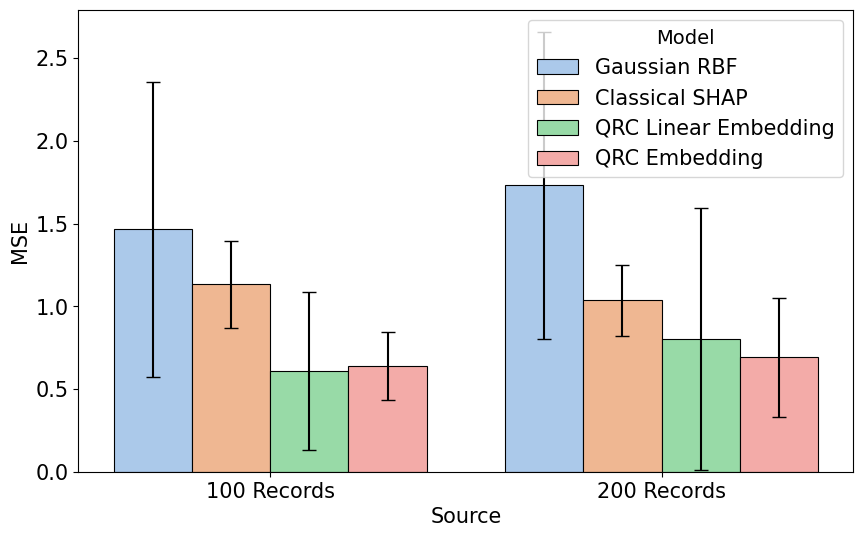

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Combine the data from rec100 and rec200 dictionaries into a single DataFrame
data = []
for source, data_dict in zip(['rec100', 'rec200'], [rec100_dict, rec200_dict]):
    for model, scores in data_dict['mse'].items():
        for score in scores:
            data.append({'Model': model, 'MSE': score, 'Source': source})

df = pd.DataFrame(data)

# Calculate means and standard deviations for error bars
means = df.groupby(['Source', 'Model'])['MSE'].mean().reset_index()
stds = df.groupby(['Source', 'Model'])['MSE'].std().reset_index()

# Merge means and stds for easier plotting
means = means.merge(stds, on=['Source', 'Model'], suffixes=('_mean', '_std'))

# Define the order of the models
model_order = ["Gaussian RBF", "Classical SHAP", "QRC Linear Embedding", "QRC Embedding"]

# Define a pastel color palette
pastel_palette = sns.color_palette("pastel")

# Create the bar chart
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=means, x='Source', y='MSE_mean', hue='Model', hue_order=model_order, palette=pastel_palette, errorbar=None)

# Add vertical error bars
for i in range(means.shape[0]):
    row = means.iloc[i]
    bar = barplot.patches[i]
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    plt.errorbar(x=x, y=y, yerr=row['MSE_std'], fmt='none', c='black', capsize=5)

for bar in barplot.patches:
    bar.set_edgecolor('black')
    bar.set_linewidth(0.8)
    
# Set the title and labels
plt.xlabel('Source', fontsize=15)
plt.ylabel('MSE', fontsize=15)
x_labels = ['100 Records', '200 Records']
plt.xticks(ticks=np.arange(len(x_labels)), labels=x_labels, fontsize=15)
plt.yticks(fontsize=15)
plt.legend(title='Model', title_fontsize=14, fontsize=15)

# Show the plot
plt.savefig('results_act_5_centered_error_bars_v9.pdf')
plt.savefig('results_act_5_centered_error_bars_v9.png')
plt.show()

# Actfile 9

In [9]:
#SHAP GRAD
# rec100_dict = {
#     'mse': {
#         'Classical SHAP': [0.874651448,	0.486709679, 0.388689555, 0.536247996, 0.279595705],
#         'QRC Embedding': [0.64666003, 0.68403954, 0.064333841,  0.479731904, 0.285194112],
#         'QRC Linear Embedding': [0.701383735, 0.224547482, 0.152358377, 0.237734115, 0.609830308],
#         'Gaussian RBF': [0.972651646, 0.471015222, 0.503828759, 1.228936908, 1.535151963]
#     },
#     'mae': {
#         'Classical SHAP': [0.7584587, 0.57887045, 0.43040525, 1.31693365, 0.3289539],
#         'QRC Embedding': [0.77491225, 0.463305375, 0.31247925, 0.707712813, 0.214320438],
#         'QRC Linear Embedding': [0.350, 0.299, 0.407, 0.320, 0.376],
#         'Gaussian RBF': [0.416, 0.350, 0.507, 0.360, 0.360]
#     },
#     'r2': {
#         'Classical SHAP': [0.418645682, 0.860270127, 0.75076026, 0.222738717, 0.812563398],
#         'QRC Embedding': [0.757202061, 0.893584916, 0.881585639, 0.776911469, 0.931186662],
#         'QRC Linear Embedding': [0.398, 0.632, 0.415, 0.255,0.416],
#         'Gaussian RBF': [0.136, 0.489, 0.011, 0.034, 0.034] 
#     }
# }

#SHAP Kern
rec100_dict = {
    'mse': {
        'Classical SHAP': [0.88355488, 0.465443504, 0.347833879, 0.517826172, 0.277908685],
        'QRC Embedding': [0.374465909, 0.737446009, 0.683963249, 0.439924784, 0.239662715],
        'QRC Linear Embedding': [0.562401958, 0.312811315, 0.764465199, 0.291930385, 0.944709856],
        'Gaussian RBF': [0.972651646, 0.471015222, 0.503828759, 1.228936908, 1.535151963]
    },
    'mae': {
        'Classical SHAP': [0.7584587, 0.57887045, 0.43040525, 1.31693365, 0.3289539],
        'QRC Embedding': [0.77491225, 0.463305375, 0.31247925, 0.707712813, 0.214320438],
        'QRC Linear Embedding': [0.350, 0.299, 0.407, 0.320, 0.376],
        'Gaussian RBF': [0.416, 0.350, 0.507, 0.360, 0.360]
    },
    'r2': {
        'Classical SHAP': [0.418645682, 0.860270127, 0.75076026, 0.222738717, 0.812563398],
        'QRC Embedding': [0.757202061, 0.893584916, 0.881585639, 0.776911469, 0.931186662],
        'QRC Linear Embedding': [0.398, 0.632, 0.415, 0.255,0.416],
        'Gaussian RBF': [0.136, 0.489, 0.011, 0.034, 0.034] 
    }
}

In [11]:
#SHAP Grad
# rec200_dict = {
#     'mse': {
#         'Classical SHAP': [0.453851905, 0.147793685, 0.180023746, 0.538039957, 0.63456953],
#         'QRC Embedding': [0.529559943, 0.260839549,	0.453367619, 0.282502053, 0.360610414],
#         'QRC Linear Embedding': [0.63644848, 0.192427413, 0.503385269, 0.233716314, 0.406681769],
#         'Gaussian RBF': [0.449214393, 1.704742964, 0.67389568, 0.686203611, 1.560348636]
#     },
#     'mae': {
#         'Classical SHAP': [0.223178575, 0.753028725, 0.6296537, 0.664364325, 0.745505125],
#         'QRC Embedding': [0.395756906, 0.660071125, 0.670619851, 0.434181625, 0.737360644],
#         'QRC Linear Embedding': [0.314, 0.246, 0.301523, 0.213, 0.274],
#         'Gaussian RBF': [0.551439411, 0.620032569, 0.600514054, 0.797493138, 1.037652847]
#     },
#     'r2': {
#         'Classical SHAP': [0.821159539, 0.65059282, 0.800047731, 0.551461666, 0.457966222],
#         'QRC Embedding': [0.588472937, 0.596498552, 0.778666522, 0.700616181, 0.658061273],
#         'QRC Linear Embedding': [0.304, 0.595, 0.531, 0.817, 0.480],
#         'Gaussian RBF': [-1.143397528, 0.68222356, 0.851759492, 0.329471373, 0.149876301]
#     }
# }

#SHAP Kern
rec200_dict = {
    'mse': {
        'Classical SHAP': [0.417827882, 0.182161715, 0.195558079, 0.552908392, 0.637661925],
        'QRC Embedding': [0.507352405, 0.135554279, 0.322825227, 0.351800382, 0.46653603],
        'QRC Linear Embedding': [0.452411275, 0.14882384, 0.660270475, 0.206462337, 0.186515575],
        'Gaussian RBF': [0.449214393, 1.704742964, 0.67389568, 0.686203611, 1.560348636]
    },
    'mae': {
        'Classical SHAP': [0.223178575, 0.753028725, 0.6296537, 0.664364325, 0.745505125],
        'QRC Embedding': [0.395756906, 0.660071125, 0.670619851, 0.434181625, 0.737360644],
        'QRC Linear Embedding': [0.314, 0.246, 0.301523, 0.213, 0.274],
        'Gaussian RBF': [0.551439411, 0.620032569, 0.600514054, 0.797493138, 1.037652847]
    },
    'r2': {
        'Classical SHAP': [0.821159539, 0.65059282, 0.800047731, 0.551461666, 0.457966222],
        'QRC Embedding': [0.588472937, 0.596498552, 0.778666522, 0.700616181, 0.658061273],
        'QRC Linear Embedding': [0.304, 0.595, 0.531, 0.817, 0.480],
        'Gaussian RBF': [-1.143397528, 0.68222356, 0.851759492, 0.329471373, 0.149876301]
    }
}

In [12]:
# rec800_dict = {
#     'mse': {
#         'Classical SHAP': [0.202, 0.163, 0.157, 0.133, 0.095],
#         'QRC Embedding': [0.182, 0.120, 0.116, 0.072, 0.214],
#         'QRC Linear Embedding': [0.180, 0.121, 0.137, 0.095, 0.189],
#         'Gaussian RBF': [0.268, 0.173, 0.192, 0.189, 0.128]
#     },
#     'mae': {
#         'Classical SHAP': [0.341, 0.282, 0.330, 0.287, 0.228],
#         'QRC Embedding': [0.303, 0.256, 0.266, 0.197, 0.284],
#         'QRC Linear Embedding': [0.314, 0.246, 0.301523, 0.213, 0.274],
#         'Gaussian RBF': [0.420, 0.324, 0.353, 0.370, 0.273]
#     },
#     'r2': {
#         'Classical SHAP': [0.518, 0.373, 0.463, 0.547, 0.817],
#         'QRC Embedding': [0.298, 0.599, 0.604, 0.861, 0.411],
#         'QRC Linear Embedding': [0.304, 0.595, 0.531, 0.817, 0.480],
#         'Gaussian RBF': [0.362, 0.332, 0.347, 0.357, 0.755]
#     }
# }

/tmp/ipykernel_2678835/4176304126.py:30: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  barplot = sns.barplot(data=means, x='Source', y='MSE_mean', hue='Model', hue_order=model_order, palette=pastel_palette, errorbar=None)


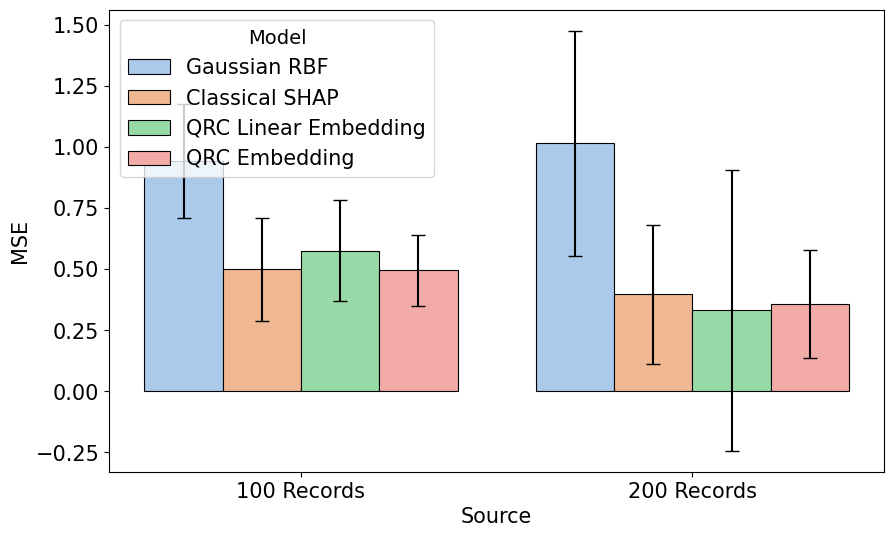

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Combine the data from rec100 and rec200 dictionaries into a single DataFrame
data = []
for source, data_dict in zip(['rec100', 'rec200'], [rec100_dict, rec200_dict]):
    for model, scores in data_dict['mse'].items():
        for score in scores:
            data.append({'Model': model, 'MSE': score, 'Source': source})

df = pd.DataFrame(data)

# Calculate means and standard deviations for error bars
means = df.groupby(['Source', 'Model'])['MSE'].mean().reset_index()
stds = df.groupby(['Source', 'Model'])['MSE'].std().reset_index()

# Merge means and stds for easier plotting
means = means.merge(stds, on=['Source', 'Model'], suffixes=('_mean', '_std'))

# Define the order of the models
model_order = ["Gaussian RBF", "Classical SHAP", "QRC Linear Embedding", "QRC Embedding"]

# Define a pastel color palette
pastel_palette = sns.color_palette("pastel")

# Create the bar chart
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=means, x='Source', y='MSE_mean', hue='Model', hue_order=model_order, palette=pastel_palette, errorbar=None)

# Add vertical error bars
for i in range(means.shape[0]):
    row = means.iloc[i]
    bar = barplot.patches[i]
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    plt.errorbar(x=x, y=y, yerr=row['MSE_std'], fmt='none', c='black', capsize=5)

for bar in barplot.patches:
    bar.set_edgecolor('black')
    bar.set_linewidth(0.8)
    
# Set the title and labels
plt.xlabel('Source', fontsize=15)
plt.ylabel('MSE', fontsize=15)
x_labels = ['100 Records', '200 Records']
plt.xticks(ticks=np.arange(len(x_labels)), labels=x_labels, fontsize=15)
plt.yticks(fontsize=15)
plt.legend(title='Model', title_fontsize=14, fontsize=15)

# Show the plot
plt.savefig('results_act_9_centered_error_bars_v9.pdf')
plt.savefig('results_act_9_centered_error_bars_v9.png')
plt.show()

# Actfile 14

In [14]:
#SHAP GRAD

# rec100_dict = {
#     'mse': {
#         'Classical SHAP': [0.122914418, 0.136486878, 0.076026953, 0.245997221, 0.271845302],
#         'QRC Embedding': [0.166786934, 0.080807656, 0.08984923, 0.080406963, 0.063379256],
#         'QRC Linear Embedding': [0.060794023, 0.063304128, 0.060435626, 0.093342988, 0.10877688],
#         'Gaussian RBF': [0.181861614, 0.085732655, 0.30147589, 0.132774483, 0.335685421]
#     },
#     'mae': {
#         'Classical SHAP': [0.436, 0.306, 0.491, 0.320, 0.320],
#         'QRC Embedding': [0.329, 0.296, 0.422, 0.300, 0.349],
#         'QRC Linear Embedding': [0.350, 0.299, 0.407, 0.320, 0.376],
#         'Gaussian RBF': [0.416, 0.350, 0.507, 0.360, 0.360]
#     },
#     'r2': {
#         'Classical SHAP': [0.117, 0.632, 0.136, 0.165, 0.165],
#         'QRC Embedding': [0.459, 0.643, 0.370, 0.304, 0.480],
#         'QRC Linear Embedding': [0.398, 0.632, 0.415, 0.255,0.416],
#         'Gaussian RBF': [0.136, 0.489, 0.011, 0.034, 0.034] 
#     }
# }

# SHAP KERN

rec100_dict = {
    'mse': {
        'Classical SHAP': [0.140672905, 0.122571397, 0.074747642, 0.256538229, 0.280093199],
        'QRC Embedding': [0.052685765, 0.170923228, 0.055110907, 0.125059731, 0.086062138],
        'QRC Linear Embedding': [0.067065134, 0.137633756, 0.142075954, 0.095751376, 0.066559214],
        'Gaussian RBF': [0.181861614, 0.085732655, 0.30147589, 0.132774483, 0.335685421]
    },
    'mae': {
        'Classical SHAP': [0.436, 0.306, 0.491, 0.320, 0.320],
        'QRC Embedding': [0.329, 0.296, 0.422, 0.300, 0.349],
        'QRC Linear Embedding': [0.350, 0.299, 0.407, 0.320, 0.376],
        'Gaussian RBF': [0.416, 0.350, 0.507, 0.360, 0.360]
    },
    'r2': {
        'Classical SHAP': [0.117, 0.632, 0.136, 0.165, 0.165],
        'QRC Embedding': [0.459, 0.643, 0.370, 0.304, 0.480],
        'QRC Linear Embedding': [0.398, 0.632, 0.415, 0.255,0.416],
        'Gaussian RBF': [0.136, 0.489, 0.011, 0.034, 0.034] 
    }
}

In [15]:
#SHAP GRAD
# rec200_dict = {
#     'mse': {
#         'Classical SHAP': [0.074338908, 0.083380235, 0.101542677, 0.084803314, 0.108967477],
#         'QRC Embedding': [0.133800592, 0.059432939, 0.06050626, 0.08500085, 0.131486056],
#         'QRC Linear Embedding': [0.041016612, 0.064640343, 0.134432065, 0.145811793, 0.193393179],
#         'Gaussian RBF': [0.132808784, 0.5025043, 0.219204566, 0.112415697, 0.27446441]
#     },
#     'mae': {
#         'Classical SHAP': [0.341, 0.282, 0.330, 0.287, 0.228],
#         'QRC Embedding': [0.303, 0.256, 0.266, 0.197, 0.284],
#         'QRC Linear Embedding': [0.314, 0.246, 0.301523, 0.213, 0.274],
#         'Gaussian RBF': [0.420, 0.324, 0.353, 0.370, 0.273]
#     },
#     'r2': {
#         'Classical SHAP': [0.518, 0.373, 0.463, 0.547, 0.817],
#         'QRC Embedding': [0.298, 0.599, 0.604, 0.861, 0.411],
#         'QRC Linear Embedding': [0.304, 0.595, 0.531, 0.817, 0.480],
#         'Gaussian RBF': [0.362, 0.332, 0.347, 0.357, 0.755]
#     }
# }

#SHAP KERN
rec200_dict = {
    'mse': {
        'Classical SHAP': [0.084774994, 0.081482199, 0.116575805, 0.086656745, 0.101566981],
        'QRC Embedding': [0.05912117, 0.073329353, 0.082366658, 0.040006535, 0.111156936],
        'QRC Linear Embedding': [0.174216353, 0.06498095, 0.122913253, 0.072529778, 0.16475555],
        'Gaussian RBF': [0.132808784, 0.5025043, 0.219204566, 0.112415697, 0.27446441]
    },
    'mae': {
        'Classical SHAP': [0.341, 0.282, 0.330, 0.287, 0.228],
        'QRC Embedding': [0.303, 0.256, 0.266, 0.197, 0.284],
        'QRC Linear Embedding': [0.314, 0.246, 0.301523, 0.213, 0.274],
        'Gaussian RBF': [0.420, 0.324, 0.353, 0.370, 0.273]
    },
    'r2': {
        'Classical SHAP': [0.518, 0.373, 0.463, 0.547, 0.817],
        'QRC Embedding': [0.298, 0.599, 0.604, 0.861, 0.411],
        'QRC Linear Embedding': [0.304, 0.595, 0.531, 0.817, 0.480],
        'Gaussian RBF': [0.362, 0.332, 0.347, 0.357, 0.755]
    }
}

In [16]:
# rec800_dict = {
#     'mse': {
#         'Classical SHAP': [0.202, 0.163, 0.157, 0.133, 0.095],
#         'QRC Embedding': [0.182, 0.120, 0.116, 0.072, 0.214],
#         'QRC Linear Embedding': [0.180, 0.121, 0.137, 0.095, 0.189],
#         'Gaussian RBF': [0.268, 0.173, 0.192, 0.189, 0.128]
#     },
#     'mae': {
#         'Classical SHAP': [0.341, 0.282, 0.330, 0.287, 0.228],
#         'QRC Embedding': [0.303, 0.256, 0.266, 0.197, 0.284],
#         'QRC Linear Embedding': [0.314, 0.246, 0.301523, 0.213, 0.274],
#         'Gaussian RBF': [0.420, 0.324, 0.353, 0.370, 0.273]
#     },
#     'r2': {
#         'Classical SHAP': [0.518, 0.373, 0.463, 0.547, 0.817],
#         'QRC Embedding': [0.298, 0.599, 0.604, 0.861, 0.411],
#         'QRC Linear Embedding': [0.304, 0.595, 0.531, 0.817, 0.480],
#         'Gaussian RBF': [0.362, 0.332, 0.347, 0.357, 0.755]
#     }
# }

/tmp/ipykernel_2678835/1655386890.py:30: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  barplot = sns.barplot(data=means, x='Source', y='MSE_mean', hue='Model', hue_order=model_order, palette=pastel_palette, errorbar=None)


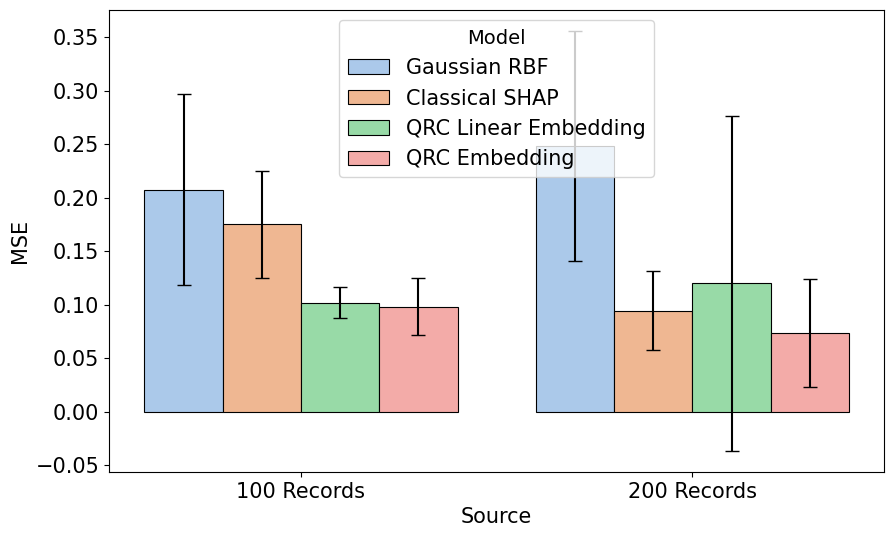

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Combine the data from rec100 and rec200 dictionaries into a single DataFrame
data = []
for source, data_dict in zip(['rec100', 'rec200'], [rec100_dict, rec200_dict]):
    for model, scores in data_dict['mse'].items():
        for score in scores:
            data.append({'Model': model, 'MSE': score, 'Source': source})

df = pd.DataFrame(data)

# Calculate means and standard deviations for error bars
means = df.groupby(['Source', 'Model'])['MSE'].mean().reset_index()
stds = df.groupby(['Source', 'Model'])['MSE'].std().reset_index()

# Merge means and stds for easier plotting
means = means.merge(stds, on=['Source', 'Model'], suffixes=('_mean', '_std'))

# Define the order of the models
model_order = ["Gaussian RBF", "Classical SHAP", "QRC Linear Embedding", "QRC Embedding"]

# Define a pastel color palette
pastel_palette = sns.color_palette("pastel")

# Create the bar chart
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=means, x='Source', y='MSE_mean', hue='Model', hue_order=model_order, palette=pastel_palette, errorbar=None)

# Add vertical error bars
for i in range(means.shape[0]):
    row = means.iloc[i]
    bar = barplot.patches[i]
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    plt.errorbar(x=x, y=y, yerr=row['MSE_std'], fmt='none', c='black', capsize=5)

for bar in barplot.patches:
    bar.set_edgecolor('black')
    bar.set_linewidth(0.8)
    
# Set the title and labels
plt.xlabel('Source', fontsize=15)
plt.ylabel('MSE', fontsize=15)
x_labels = ['100 Records', '200 Records']
plt.xticks(ticks=np.arange(len(x_labels)), labels=x_labels, fontsize=15)
plt.yticks(fontsize=15)
plt.legend(title='Model', title_fontsize=14, fontsize=15)

# Show the plot
plt.savefig('results_act_14_centered_error_bars_v9.pdf')
plt.savefig('results_act_14_centered_error_bars_v9.png')
plt.show()

# Actfile 15

In [18]:
#SHAP GRAD
# rec100_dict = {
#     'mse': {
#         'Classical SHAP': [1.052953644, 2.450447454, 0.815139738, 2.853784395, 0.959084428],
#         'QRC Embedding': [1.072198355, 1.980251956, 0.833689767, 1.369849442, 2.636432666],
#         'QRC Linear Embedding': [0.739416849, 1.25974962, 0.765485428, 2.24986548, 0.440496208],
#         'Gaussian RBF': [2.15427794, 2.482779951, 1.57851537, 2.271114029, 1.959959421]
#     },
#     'mae': {
#         'Classical SHAP': [0.436, 0.306, 0.491, 0.320, 0.320],
#         'QRC Embedding': [0.329, 0.296, 0.422, 0.300, 0.349],
#         'QRC Linear Embedding': [0.350, 0.299, 0.407, 0.320, 0.376],
#         'Gaussian RBF': [0.869101204, 0.659951599, 0.766604696, 1.22206452, 0.259893679]
#     },
#     'r2': {
#         'Classical SHAP': [0.117, 0.632, 0.136, 0.165, 0.165],
#         'QRC Embedding': [0.459, 0.643, 0.370, 0.304, 0.480],
#         'QRC Linear Embedding': [0.398, 0.632, 0.415, 0.255,0.416],
#         'Gaussian RBF': [0.29556963, 0.817258862, 0.221711793, 0.260547211, 0.913211984] 
#     }
# }

#SHAP KERN
rec100_dict = {
    'mse': {
        'Classical SHAP': [0.978436661, 2.453651276, 0.957410326, 2.735110941, 0.923666715],
        'QRC Embedding': [1.301550447, 1.357136391, 0.842304792, 1.525138243, 2.181248132],
        'QRC Linear Embedding': [2.063762437, 0.824065557, 0.242869575, 2.395293058, 1.459989749],
        'Gaussian RBF': [2.15427794, 2.482779951, 1.57851537, 2.271114029, 1.959959421]
    },
    'mae': {
        'Classical SHAP': [0.436, 0.306, 0.491, 0.320, 0.320],
        'QRC Embedding': [0.329, 0.296, 0.422, 0.300, 0.349],
        'QRC Linear Embedding': [0.350, 0.299, 0.407, 0.320, 0.376],
        'Gaussian RBF': [0.869101204, 0.659951599, 0.766604696, 1.22206452, 0.259893679]
    },
    'r2': {
        'Classical SHAP': [0.117, 0.632, 0.136, 0.165, 0.165],
        'QRC Embedding': [0.459, 0.643, 0.370, 0.304, 0.480],
        'QRC Linear Embedding': [0.398, 0.632, 0.415, 0.255,0.416],
        'Gaussian RBF': [0.29556963, 0.817258862, 0.221711793, 0.260547211, 0.913211984] 
    }
}

In [20]:
#SHAP GRAD
# rec200_dict = {
#     'mse': {
#         'Classical SHAP': [1.416284717, 1.028164347, 1.654302372, 1.832537664, 2.050764025],
#         'QRC Embedding': [1.949103013, 0.546021137, 2.000128691, 0.749158734, 1.397473268],
#         'QRC Linear Embedding': [1.433243567, 1.378946423, 1.37732368, 0.858633872, 0.722786446],
#         'Gaussian RBF': [1.688796842, 1.278877533, 1.711298941, 2.316330322, 3.882815945]
#     },
#     'mae': {
#         'Classical SHAP': [0.341, 0.282, 0.330, 0.287, 0.228],
#         'QRC Embedding': [0.303, 0.256, 0.266, 0.197, 0.284],
#         'QRC Linear Embedding': [0.314, 0.246, 0.301523, 0.213, 0.274],
#         'Gaussian RBF': [0.551439411, 0.620032569, 0.600514054, 0.797493138, 1.037652847]
#     },
#     'r2': {
#         'Classical SHAP': [0.518, 0.373, 0.463, 0.547, 0.817],
#         'QRC Embedding': [0.298, 0.599, 0.604, 0.861, 0.411],
#         'QRC Linear Embedding': [0.304, 0.595, 0.531, 0.817, 0.480],
#         'Gaussian RBF': [-1.143397528, 0.68222356, 0.851759492, 0.329471373, 0.149876301]
#     }
# }

#SHAP KERN
rec200_dict = {
    'mse': {
        'Classical SHAP': [1.368434873, 1.095469347, 1.569328328, 1.882792386, 2.189025902],
        'QRC Embedding': [0.95485598, 1.001906532, 1.166955755, 0.756286343, 0.930621022],
        'QRC Linear Embedding': [0.735054153, 0.845136917, 2.965040189, 0.5852031, 1.613743695],
        'Gaussian RBF': [1.688796842, 1.278877533, 1.711298941, 2.316330322, 3.882815945]
    },
    'mae': {
        'Classical SHAP': [0.341, 0.282, 0.330, 0.287, 0.228],
        'QRC Embedding': [0.303, 0.256, 0.266, 0.197, 0.284],
        'QRC Linear Embedding': [0.314, 0.246, 0.301523, 0.213, 0.274],
        'Gaussian RBF': [0.551439411, 0.620032569, 0.600514054, 0.797493138, 1.037652847]
    },
    'r2': {
        'Classical SHAP': [0.518, 0.373, 0.463, 0.547, 0.817],
        'QRC Embedding': [0.298, 0.599, 0.604, 0.861, 0.411],
        'QRC Linear Embedding': [0.304, 0.595, 0.531, 0.817, 0.480],
        'Gaussian RBF': [-1.143397528, 0.68222356, 0.851759492, 0.329471373, 0.149876301]
    }
}

In [21]:
# rec800_dict = {
#     'mse': {
#         'Classical SHAP': [0.202, 0.163, 0.157, 0.133, 0.095],
#         'QRC Embedding': [0.182, 0.120, 0.116, 0.072, 0.214],
#         'QRC Linear Embedding': [0.180, 0.121, 0.137, 0.095, 0.189],
#         'Gaussian RBF': [0.268, 0.173, 0.192, 0.189, 0.128]
#     },
#     'mae': {
#         'Classical SHAP': [0.341, 0.282, 0.330, 0.287, 0.228],
#         'QRC Embedding': [0.303, 0.256, 0.266, 0.197, 0.284],
#         'QRC Linear Embedding': [0.314, 0.246, 0.301523, 0.213, 0.274],
#         'Gaussian RBF': [0.420, 0.324, 0.353, 0.370, 0.273]
#     },
#     'r2': {
#         'Classical SHAP': [0.518, 0.373, 0.463, 0.547, 0.817],
#         'QRC Embedding': [0.298, 0.599, 0.604, 0.861, 0.411],
#         'QRC Linear Embedding': [0.304, 0.595, 0.531, 0.817, 0.480],
#         'Gaussian RBF': [0.362, 0.332, 0.347, 0.357, 0.755]
#     }
# }

/tmp/ipykernel_2678835/2310715445.py:30: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  barplot = sns.barplot(data=means, x='Source', y='MSE_mean', hue='Model', hue_order=model_order, palette=pastel_palette, errorbar=None)


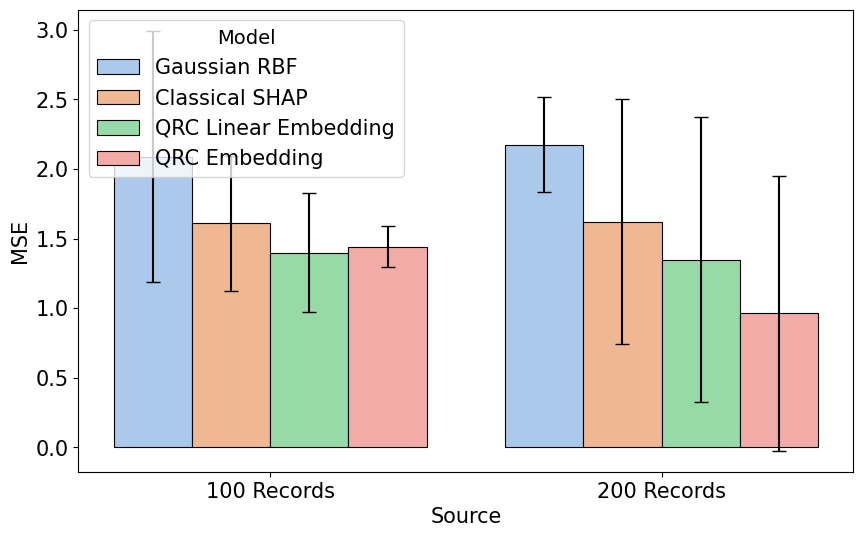

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Combine the data from rec100 and rec200 dictionaries into a single DataFrame
data = []
for source, data_dict in zip(['rec100', 'rec200'], [rec100_dict, rec200_dict]):
    for model, scores in data_dict['mse'].items():
        for score in scores:
            data.append({'Model': model, 'MSE': score, 'Source': source})

df = pd.DataFrame(data)

# Calculate means and standard deviations for error bars
means = df.groupby(['Source', 'Model'])['MSE'].mean().reset_index()
stds = df.groupby(['Source', 'Model'])['MSE'].std().reset_index()

# Merge means and stds for easier plotting
means = means.merge(stds, on=['Source', 'Model'], suffixes=('_mean', '_std'))

# Define the order of the models
model_order = ["Gaussian RBF", "Classical SHAP", "QRC Linear Embedding", "QRC Embedding"]

# Define a pastel color palette
pastel_palette = sns.color_palette("pastel")

# Create the bar chart
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=means, x='Source', y='MSE_mean', hue='Model', hue_order=model_order, palette=pastel_palette, errorbar=None)

# Add vertical error bars
for i in range(means.shape[0]):
    row = means.iloc[i]
    bar = barplot.patches[i]
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    plt.errorbar(x=x, y=y, yerr=row['MSE_std'], fmt='none', c='black', capsize=5)

for bar in barplot.patches:
    bar.set_edgecolor('black')
    bar.set_linewidth(0.8)
    
# Set the title and labels
plt.xlabel('Source', fontsize=15)
plt.ylabel('MSE', fontsize=15)
x_labels = ['100 Records', '200 Records']
plt.xticks(ticks=np.arange(len(x_labels)), labels=x_labels, fontsize=15)
plt.yticks(fontsize=15)
plt.legend(title='Model', title_fontsize=14, fontsize=15)

# Show the plot
plt.savefig('results_act_15_centered_error_bars_v9.pdf')
plt.savefig('results_act_15_centered_error_bars_v9.png')
plt.show()

# 100 records 25 subsamples of 

In [15]:
# #SHAP KERN
# rec100_dict = {
#     'mse': {
#         'Classical SHAP': [0.205686795, 0.078978909, 0.162829796, 0.095412682, 0.230678948, 0.086600019, 0.246263738, 0.022430684, 0.231224584, 0.178788346, 0.129419224, 0.152294519, 0.164964685, 0.272444857, 0.086740609, 0.134110351, 0.116833365, 0.191383116, 0.130107492, 0.102518446, 0.288320165, 0.156703759, 0.091505803, 0.144014052, 0.06172874],
#         'QRC Embedding': [0.090380008, 0.171790718, 0.125258678, 0.128931064, 0.097866798, 0.046645564, 0.166383023, 0.035228662, 0.13674394, 0.111387862, 0.154518377, 0.101678236, 0.080488909, 0.237049517, 0.091510283, 0.036809979, 0.124820983, 0.125275999, 0.069893004, 0.113751113, 0.055466118, 0.046656202, 0.066405685, 0.016586502, 0.034016144],
#         'QRC Linear Embedding': [0.079685394, 0.040904275, 0.035746181, 0.021850785, 0.121754357, 0.103277757, 0.040116019, 0.004850072, 0.007892297, 0.070170087, 0.102137642, 0.207814393, 0.123135864, 0.19115052, 0.076045464, 0.056560629, 0.071600679, 0.069291307, 0.099200347, 0.323106484, 0.004669746, 0.262087564, 0.097161682, 0.032877005, 0.099090375],
#         'Gaussian RBF': [0.205923834, 0.081583448, 0.16668817, 0.120022944, 0.226880556, 0.092202654, 0.247490225, 0.019897967, 0.208962015, 0.18352414, 0.133555191, 0.142757102, 0.165298822, 0.294750161, 0.087954078, 0.131125812, 0.112104944, 0.171221186, 0.129123802, 0.107106781, 0.295977828, 0.169852837, 0.093958528 , 0.145292565, 0.061914617]
#     },
#     'mae': {
#         'Classical SHAP': [0.436, 0.306, 0.491, 0.320, 0.320],
#         'QRC Embedding': [0.329, 0.296, 0.422, 0.300, 0.349],
#         'QRC Linear Embedding': [0.350, 0.299, 0.407, 0.320, 0.376],
#         'Gaussian RBF': [0.869101204, 0.659951599, 0.766604696, 1.22206452, 0.259893679]
#     },
#     'r2': {
#         'Classical SHAP': [0.117, 0.632, 0.136, 0.165, 0.165],
#         'QRC Embedding': [0.459, 0.643, 0.370, 0.304, 0.480],
#         'QRC Linear Embedding': [0.398, 0.632, 0.415, 0.255,0.416],
#         'Gaussian RBF': [0.29556963, 0.817258862, 0.221711793, 0.260547211, 0.913211984]  
#     },
#     'std': {
#         'Classical SHAP': [0.077993184],
#         'QRC Embedding': [0.017271758],
#         'QRC Linear Embedding': [0.089298635],
#         'Gaussian RBF': [0.080706539] 
#         }
# }

# 2025-04-21 CRC and other remake for figure 3 Act 4

In [22]:
#Updated April 21st 2025
act_dict = {
    '100mse': {
        'Gaussian RBF': [0.83344939],
        'Classical SHAP': [0.231323887],
        'QRC One-Body Embedding': [0.166404102],
        'QRC Embedding': [0.187413709],
        'Classical Reservoir': [0.173370647]
    },
    '100std': {
        'Gaussian RBF': [0.482018439], 
        'Classical SHAP': [0.055393716],
        'QRC One-Body Embedding': [0.029845006],
        'QRC Embedding': [0.047713941],
        'Classical Reservoir': [0.078646207]
        },
    '200mse': {
        'Gaussian RBF': [0.712793555],
        'Classical SHAP': [0.15300732],
        'QRC One-Body Embedding': [0.159466862],
        'QRC Embedding': [0.14894807],
        'Classical Reservoir': [0.133298374]
    },
    '200std': {
        'Gaussian RBF': [0.228159609], 
        'Classical SHAP': [0.055393716],
        'QRC One-Body Embedding': [0.060958201],
        'QRC Embedding': [0.060958201],
        'Classical Reservoir': [0.036262757]
        },
    '800mse': {
        'Gaussian RBF': [0.960301377],
        'Classical SHAP': [0.15300732],
        'QRC One-Body Embedding': [0.159466862],
        'QRC Embedding': [0.142260204],
        'Classical Reservoir': [0.13489659]
    },
    '800std': {
        'Gaussian RBF': [0.32110066], 
        'Classical SHAP': [0.04290709],
        'QRC One-Body Embedding': [0.159466862],
        'QRC Embedding': [0.013947332],
        'Classical Reservoir': [0.037093808]
        }
}

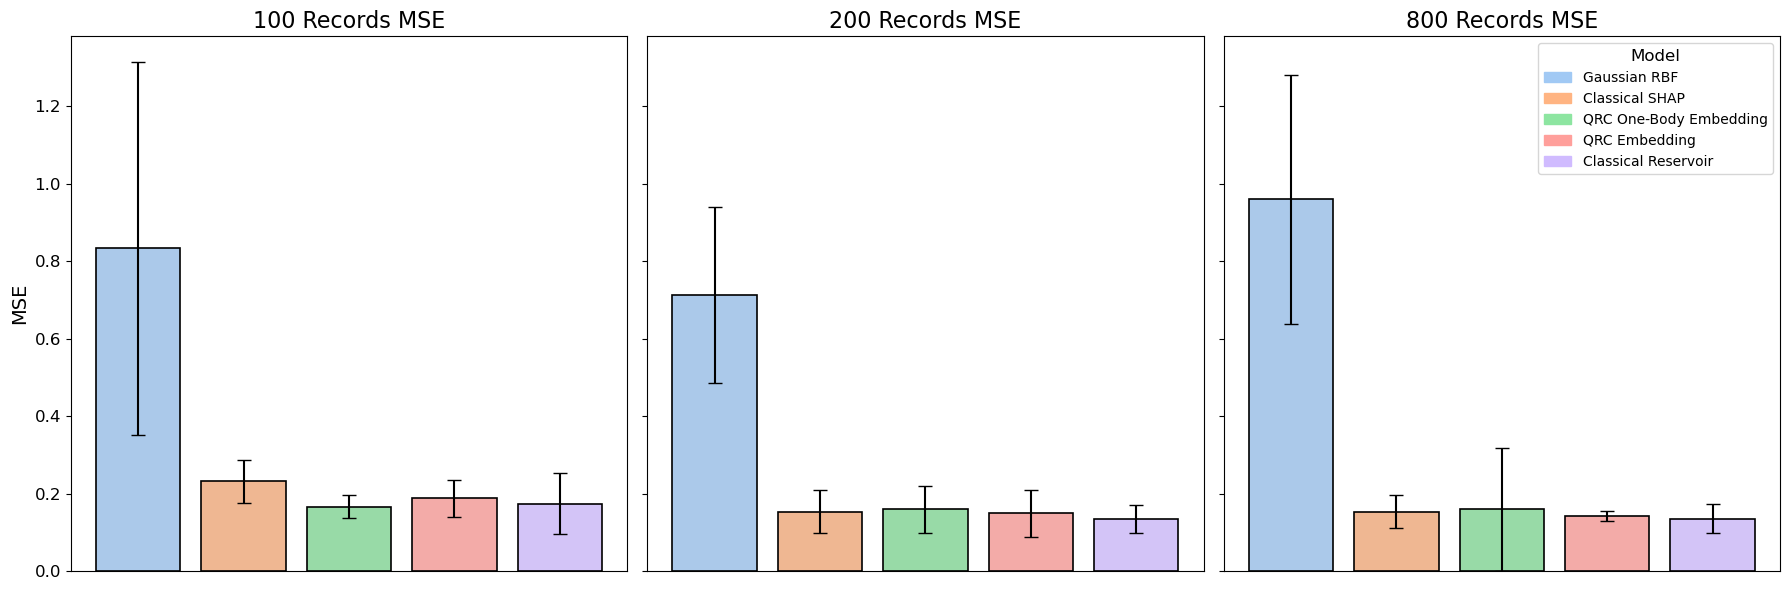

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

def createfigbyrec(actfile):
    # Extract data from act_dict
    data = []
    for key in ['100mse', '200mse', '800mse']:
        for model, mse_values in act_dict[key].items():
            std_key = key.replace('mse', 'std')
            std_value = act_dict[std_key][model][0]
            for mse in mse_values:
                data.append({'Category': key, 'Model': model, 'MSE': mse, 'STD': std_value})
    
    df = pd.DataFrame(data)
    
    # Map the Category values to the desired labels
    category_mapping = {
        '100mse': '100 Records MSE',
        '200mse': '200 Records MSE',
        '800mse': '800 Records MSE'
    }
    df['Category'] = df['Category'].map(category_mapping)
    
    # Define the order of the models
    model_order = ["Gaussian RBF", "Classical SHAP", "QRC One-Body Embedding", "QRC Embedding", "Classical Reservoir"]
    
    # Define a pastel color palette with the correct number of colors
    pastel_palette = sns.color_palette("pastel", n_colors=len(model_order))
    
    # Create the figure with subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    categories = ['100 Records MSE', '200 Records MSE', '800 Records MSE']
    
    for i, category in enumerate(categories):
        ax = axes[i]
        subset = df[df['Category'] == category]
        barplot = sns.barplot(data=subset, x='Model', y='MSE', hue='Model', hue_order=model_order, 
                              palette=pastel_palette, errorbar=None, dodge=False, ax=ax, legend=False)
        
        # Add vertical error bars
        for j, model in enumerate(model_order):
            row = subset[subset['Model'] == model].iloc[0]
            x = j
            y = row['MSE']
            yerr = row['STD']
            ax.errorbar(x=x, y=y, yerr=yerr, fmt='none', c='black', capsize=5)
        
        # Set the title and labels
        ax.set_title(category, fontsize=16)
        ax.set_xlabel('')  # Remove x-axis label
        ax.set_ylabel('MSE' if i == 0 else '', fontsize=14)
        ax.set_xticks([])  # Remove x-tick labels
        ax.tick_params(axis='x', which='both', bottom=False, top=False)  # Remove x-tick marks
        ax.tick_params(axis='y', labelsize=12)
        
        # Add black outline around bars
        for bar in barplot.patches:
            bar.set_edgecolor('black')
            bar.set_linewidth(1.2)
    
    # Add legend to the last subplot
    handles = [mpatches.Patch(color=color, label=model) for color, model in zip(pastel_palette, model_order)]
    axes[-1].legend(handles=handles, title='Model', title_fontsize=12, fontsize=10, loc='upper right')
    
    # Adjust layout
    plt.tight_layout()
    plt.savefig('actfile_100_200_800_mse_with_error_bars.pdf', dpi=300)
    plt.savefig('actfile_100_200_800_mse_with_error_bars.png', dpi=300)
    plt.show()
    return df

df = createfigbyrec(1425)

# Act 14 Rerun 2025-04-21

In [22]:
def createfigbyrec(actfile):
    # Extract data from act_dict
    data = []
    for key in ['100mse', '200mse', '800mse']:
        for model, mse_values in act_dict[key].items():
            std_key = key.replace('mse', 'std')
            std_value = act_dict[std_key][model][0]
            for mse in mse_values:
                data.append({'Category': key, 'Model': model, 'MSE': mse, 'STD': std_value})
    
    df = pd.DataFrame(data)
    
    # Map the Category values to the desired labels
    category_mapping = {
        '100mse': '100 Records MSE',
        '200mse': '200 Records MSE',
        '800mse': '800 Records MSE'
    }
    df['Category'] = df['Category'].map(category_mapping)
    
    # Define the order of the models
    model_order = ["Gaussian RBF", "Classical SHAP", "QRC One-Body Embedding", "QRC Embedding", "Classical Reservoir"]
    
    # Define a pastel color palette with the correct number of colors
    pastel_palette = sns.color_palette("pastel", n_colors=len(model_order))
    
    # Create the figure with subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    categories = ['100 Records MSE', '200 Records MSE', '800 Records MSE']
    
    for i, category in enumerate(categories):
        ax = axes[i]
        subset = df[df['Category'] == category]
        barplot = sns.barplot(data=subset, x='Model', y='MSE', hue='Model', hue_order=model_order, 
                              palette=pastel_palette, errorbar=None, dodge=False, ax=ax, legend=False)
        
        # Add vertical error bars
        for j, model in enumerate(model_order):
            subset_model = subset[subset['Model'] == model]
            if subset_model.empty:
                print(f"No data for model: {model} in category: {category}")
                continue
            row = subset_model.iloc[0]
            x = j
            y = row['MSE']
            yerr = row['STD']
            ax.errorbar(x=x, y=y, yerr=yerr, fmt='none', c='black', capsize=5)
        
        # Set the title and labels
        ax.set_title(category, fontsize=24)
        ax.set_xlabel('')  # Remove x-axis label
        ax.set_ylabel('MSE' if i == 0 else '', fontsize=24)
        ax.set_xticks([])  # Remove x-tick labels
        ax.tick_params(axis='x', which='both', bottom=False, top=False)  # Remove x-tick marks
        ax.tick_params(axis='y', labelsize=18)
        
        # Add black outline around bars
        for bar in barplot.patches:
            bar.set_edgecolor('black')
            bar.set_linewidth(1.2)
    
    # Add legend to the last subplot
    handles = [mpatches.Patch(color=color, label=model) for color, model in zip(pastel_palette, model_order)]
    axes[-1].legend(handles=handles, title='Model', title_fontsize=23, fontsize=22, loc='upper right')
    
    # Adjust layout
    plt.tight_layout()
    plt.savefig('actfile_14_mse_with_error_bars_combined.pdf', dpi=300)
    plt.savefig('actfile_14_mse_with_error_bars_combined.png', dpi=300)
    plt.show()
    return df

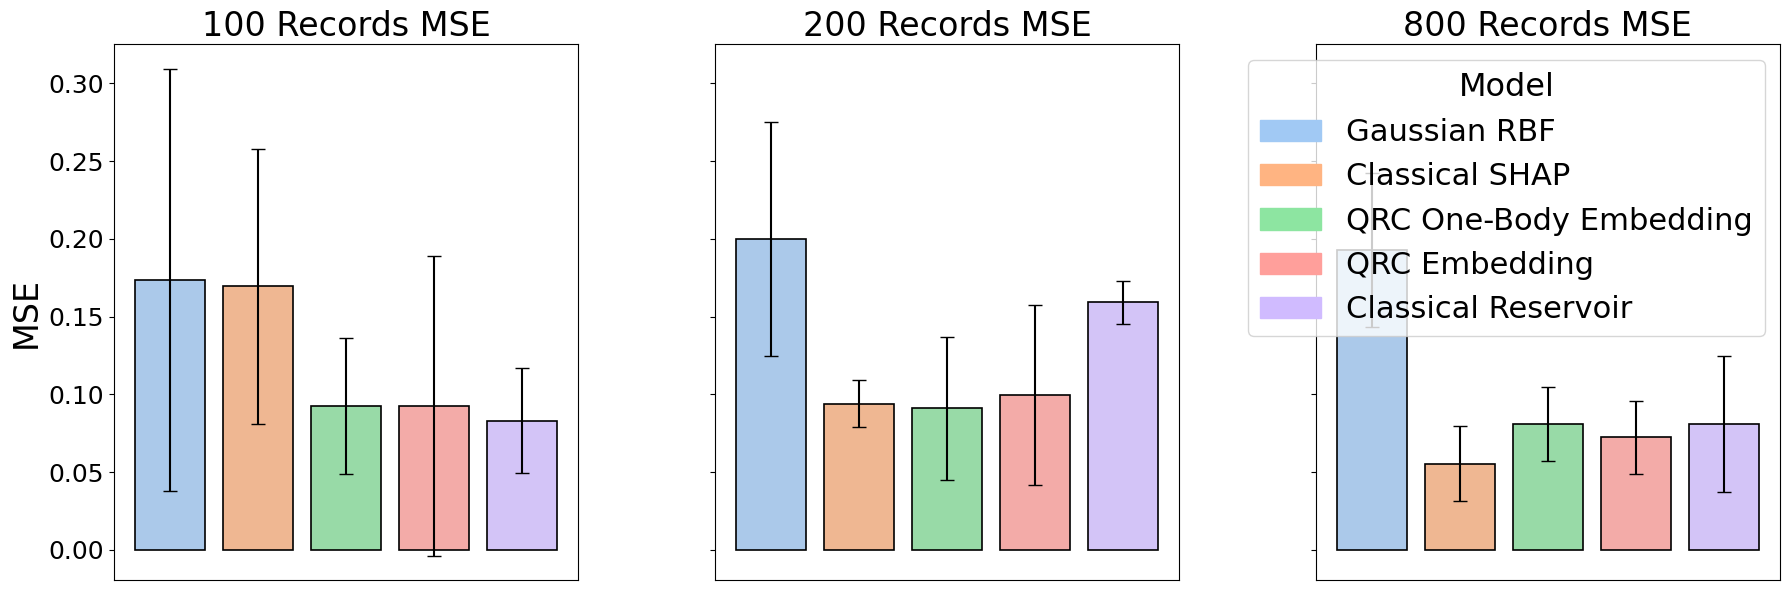

In [23]:
#SHAP KERN
act_dict = {
    '100mse': {
        'Gaussian RBF': [0.173770757],
        'Classical SHAP': [0.169384595],
        'QRC One-Body Embedding': [0.092562297],
        'QRC Embedding': [0.092562297],
        'Classical Reservoir': [0.083043084]
        
    },
    '100std': {
        'Gaussian RBF': [0.13570996], 
        'Classical SHAP': [0.088251447],
        'QRC One-Body Embedding': [0.04380101],
        'QRC Embedding': [0.096360619],
        'Classical Reservoir': [0.03372978]
        },
    '200mse': {
        'Gaussian RBF': [0.200080153],
        'Classical SHAP': [0.093863335],
        'QRC One-Body Embedding': [0.090978426],
        'QRC Embedding': [0.099374828],
        'Classical Reservoir': [0.159214174]
    },
    '200std': {
        'Gaussian RBF': [0.075311012], 
        'Classical SHAP': [0.015136371],
        'QRC One-Body Embedding': [0.045860765],
        'QRC Embedding': [0.05798016],
        'Classical Reservoir': [0.013741411]
        },
    '800mse': {
        'Gaussian RBF': [0.192811328],
        'Classical SHAP': [0.055416323],
        'QRC One-Body Embedding': [0.08086319],
        'QRC Embedding': [0.072306843],
        'Classical Reservoir': [0.080713556]
    },
    '800std': {
        'Gaussian RBF': [0.049745597], 
        'Classical SHAP': [0.024258117],
        'QRC One-Body Embedding': [0.023595278],
        'QRC Embedding': [0.023595278],
        'Classical Reservoir': [0.043788438]
        }
}
df = createfigbyrec(145)

In [ ]:
## Actfile 14 25 samples with noise model

In [14]:
act_dict = {
    '100mse': {
        'Gaussian RBF': [0.15339927],
        'Classical SHAP': [0.1484545],
        'Classical Reservoir': [0.14435836],
        #'QRC One-Body Embedding': [0.09917727],
        'QRC Embedding': [0.04382613],
        
        'QRC Noise Model': [0.115848709]
    },
    '100std': {
        'Gaussian RBF': [0.080706539], 
        'Classical SHAP': [0.077993184],
        'Classical Reservoir': [0.03231478], #'QRC One-Body Embedding': [0.089298635],
        'QRC Embedding': [0.017271758],
        
        'QRC Noise Model': [0.083880962]
        }
}

Adding error bar for 100 Records MSE - Gaussian RBF: MSE=0.15339927, STD=0.080706539, yerr=0.080706539
Adding error bar for 100 Records MSE - Classical SHAP: MSE=0.1484545, STD=0.077993184, yerr=0.077993184
Adding error bar for 100 Records MSE - Classical Reservoir: MSE=0.14435836, STD=0.03231478, yerr=0.03231478
Adding error bar for 100 Records MSE - QRC Embedding: MSE=0.04382613, STD=0.017271758, yerr=0.017271758
Adding error bar for 100 Records MSE - QRC Noise Model: MSE=0.115848709, STD=0.083880962, yerr=0.083880962


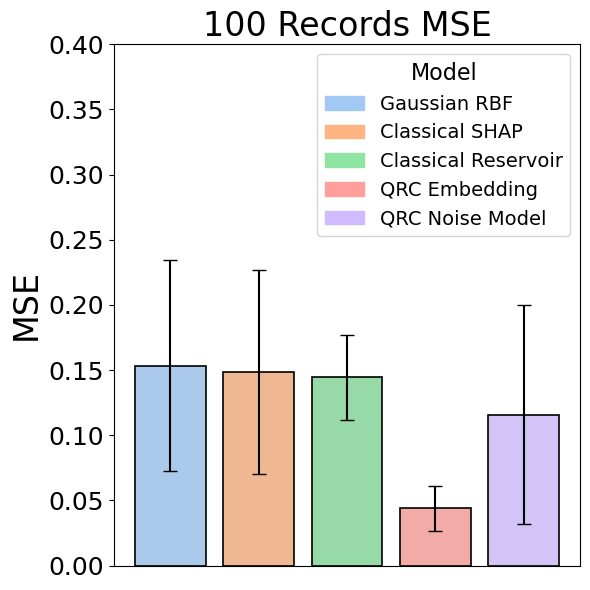

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

def createfigbyrec(actfile):
    # Extract data from act_dict
    data = []
    for key in ['100mse']:
        for model, mse_values in act_dict[key].items():
            std_key = key.replace('mse', 'std')
            std_value = act_dict[std_key][model][0]
            for mse in mse_values:
                data.append({'Category': key, 'Model': model, 'MSE': mse, 'STD': std_value})
    
    df = pd.DataFrame(data)
    
    # Map the Category values to the desired labels
    category_mapping = {
        '100mse': '100 Records MSE'
    }
    df['Category'] = df['Category'].map(category_mapping)
    
    # Define the order of the models
    model_order = ["Gaussian RBF", "Classical SHAP", "Classical Reservoir", "QRC Embedding", "QRC Noise Model"]
    
    # Define a pastel color palette with the correct number of colors
    pastel_palette = sns.color_palette("pastel", n_colors=len(model_order))
    
    # Create the figure
    plt.figure(figsize=(6, 6))
    
    # Create the bar plot
    subset = df[df['Category'] == '100 Records MSE']
    barplot = sns.barplot(data=subset, x='Model', y='MSE', hue='Model', hue_order=model_order, palette=pastel_palette, errorbar=None, dodge=False, legend=False)
    
    # Add vertical error bars
    for j, model in enumerate(model_order):
        row = subset[subset['Model'] == model].iloc[0]
        x = j
        y = row['MSE']
        yerr = row['STD']
        print(f"Adding error bar for 100 Records MSE - {model}: MSE={row['MSE']}, STD={row['STD']}, yerr={yerr}")
        plt.errorbar(x=x, y=y, yerr=yerr, fmt='none', c='black', capsize=5)
    
    # Set the title and labels
    plt.title('100 Records MSE', fontsize=24)
    plt.xlabel('')  # Remove x-axis label
    plt.ylabel('MSE', fontsize=24)
    plt.xticks([])  # Remove x-tick labels
    plt.tick_params(axis='x', which='both', bottom=False, top=False)  # Remove x-tick marks
    plt.tick_params(axis='y', labelsize=18)
    
    # Add legend
    handles = [mpatches.Patch(color=color, label=model) for color, model in zip(pastel_palette, model_order)]
    plt.legend(handles=handles, title='Model', title_fontsize=16, fontsize=14, loc='upper right')
    
    # Adjust layout
    plt.tight_layout()
    plt.ylim(top=0.40)
    # Add black outline around bars
    for bar in barplot.patches:
        bar.set_edgecolor('black')
        bar.set_linewidth(1.2)

    # Show the plot
    plt.savefig('actfile_14_25subs_100recs_mse_with_error_bars_noise_v2.pdf', dpi=300)
    plt.savefig('actfile_14_25subs_100recs_mse_with_error_bars_noise_v2.png', dpi=300)
    plt.show()
    return df    
df = createfigbyrec(1425)

In [ ]:
# 100 Records Linear Regression

In [3]:
act_dict = {
    '100mse': {
        'Gaussian RBF': [0.15339927],
        'Classical Random Forest': [0.1484545],
        'Classical Linear Regression': [0.217309407],
        'QRC One-Body Embedding Random Forest': [0.09917727],
        'QRC One-Body Embedding Linear Regression': [0.16794539],
        'QRC Embedding Random Forest': [0.04382613],
        'QRC Embedding Linear Regression': [0.165032675]    
    },
    '100std': {
        'Gaussian RBF': [0.080706539], 
        'Classical Random Forest': [0.077993184],
        'Classical Linear Regression': [0.132602458],
        'QRC One-Body Embedding Random Forest': [0.09917727],
        'QRC One-Body Embedding Linear Regression': [0.097661526],
        'QRC Embedding Random Forest': [0.017271758],
        'QRC Embedding Linear Regression': [0.086167877]
        }
}

## Noise graph 10, 100, 1000 but just for QRC noise model 

In [16]:
act_dict = {
    '100mse': {      
        '10 Samples': [0.186562616],
        '100 Samples': [0.194413317],
        '500 Samples': [0.154526477],
        '1,000 Samples': [0.115848709]
    },
    '100std': {
        '10 Samples': [0.097103295],
        '100 Samples': [0.148930689],
        '500 Samples': [0.10044117],
        '1,000 Samples': [0.083880962]
        }
}

Adding error bar for 100 Records MSE - 10 Samples: MSE=0.186562616, STD=0.097103295, yerr=0.097103295
Adding error bar for 100 Records MSE - 100 Samples: MSE=0.194413317, STD=0.148930689, yerr=0.148930689
Adding error bar for 100 Records MSE - 500 Samples: MSE=0.154526477, STD=0.10044117, yerr=0.10044117
Adding error bar for 100 Records MSE - 1,000 Samples: MSE=0.115848709, STD=0.083880962, yerr=0.083880962


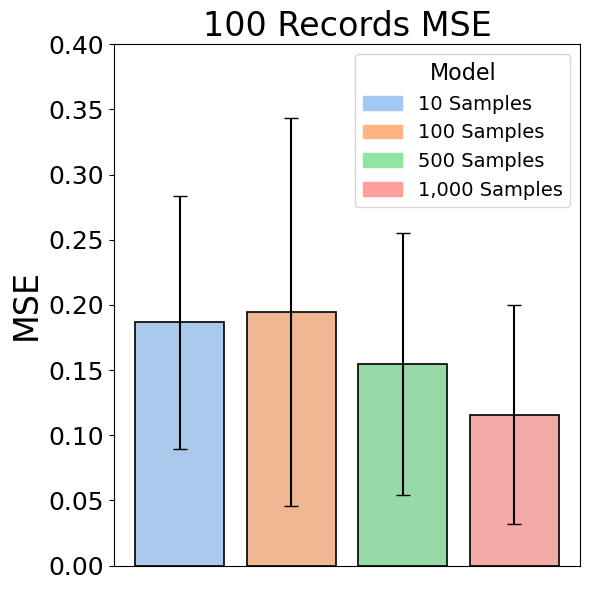

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

def createfigbyrec(actfile):
    # Extract data from act_dict
    data = []
    for key in ['100mse']:
        for model, mse_values in act_dict[key].items():
            std_key = key.replace('mse', 'std')
            std_value = act_dict[std_key][model][0]
            for mse in mse_values:
                data.append({'Category': key, 'Model': model, 'MSE': mse, 'STD': std_value})
    
    df = pd.DataFrame(data)
    
    # Map the Category values to the desired labels
    category_mapping = {
        '100mse': '100 Records MSE'
    }
    df['Category'] = df['Category'].map(category_mapping)
    
    # Define the order of the models
    model_order = ["10 Samples","100 Samples", "500 Samples", "1,000 Samples"]
    
    # Define a pastel color palette with the correct number of colors
    pastel_palette = sns.color_palette("pastel", n_colors=len(model_order))
    
    # Create the figure
    plt.figure(figsize=(6, 6))
    
    # Create the bar plot
    subset = df[df['Category'] == '100 Records MSE']
    barplot = sns.barplot(data=subset, x='Model', y='MSE', hue='Model', hue_order=model_order, palette=pastel_palette, errorbar=None, dodge=False, legend=False)
    
    # Add vertical error bars
    for j, model in enumerate(model_order):
        row = subset[subset['Model'] == model].iloc[0]
        x = j
        y = row['MSE']
        yerr = row['STD']
        print(f"Adding error bar for 100 Records MSE - {model}: MSE={row['MSE']}, STD={row['STD']}, yerr={yerr}")
        plt.errorbar(x=x, y=y, yerr=yerr, fmt='none', c='black', capsize=5)
    
    # Set the title and labels
    plt.title('100 Records MSE', fontsize=24)
    plt.xlabel('')  # Remove x-axis label
    plt.ylabel('MSE', fontsize=24)
    plt.xticks([])  # Remove x-tick labels
    plt.tick_params(axis='x', which='both', bottom=False, top=False)  # Remove x-tick marks
    plt.tick_params(axis='y', labelsize=18)
    
    # Add legend
    handles = [mpatches.Patch(color=color, label=model) for color, model in zip(pastel_palette, model_order)]
    plt.legend(handles=handles, title='Model', title_fontsize=16, fontsize=14, loc='upper right')
    
    # Adjust layout
    plt.tight_layout()
    plt.ylim(top=0.40)
    # Add black outline around bars
    for bar in barplot.patches:
        bar.set_edgecolor('black')
        bar.set_linewidth(1.2)

    # Show the plot
    plt.savefig('actfile_14_25subs_100recs_mse_with_error_bars_noise_101001000_v2.pdf', dpi=300)
    plt.savefig('actfile_14_25subs_100recs_mse_with_error_bars_noise_101001000_v2.png', dpi=300)
    plt.show()
    return df    
df = createfigbyrec(1425)

In [23]:
means

,Model,MSE,STD
0,Classical SHAP,0.148454,0.077993
1,Gaussian RBF,0.153399,0.080707
2,QRC Embedding,0.043826,0.017272
3,QRC Linear Embedding,0.099177,0.089299


# 4 Actfile Overall for 100, 200, 800 records Version 2

In [2]:
#SHAP KERN
act_dict = {
    '100mse': {
        'Gaussian RBF': [0.250],
        'Classical SHAP': [0.242],
        'QRC Linear Embedding': [0.209],
        'QRC Embedding': [0.199]
    },
    '100std': {
        'Gaussian RBF': [0.078], 
        'Classical SHAP': [0.068],
        'QRC Linear Embedding': [0.029],
        'QRC Embedding': [0.027]
        },
    '200mse': {
        'Gaussian RBF': [0.179],
        'Classical SHAP': [0.150],
        'QRC Linear Embedding': [0.145],
        'QRC Embedding': [0.141]
    },
    '200std': {
        'Gaussian RBF': [0.071], 
        'Classical SHAP': [0.039],
        'QRC Linear Embedding': [0.040],
        'QRC Embedding': [0.057]
        },
    '800mse': {
        'Gaussian RBF': [0.2078082],
        'Classical SHAP': [0.135012],
        'QRC Linear Embedding': [0.1536454],
        'QRC Embedding': [0.1555538]
    },
    '800std': {
        'Gaussian RBF': [0.047613703], 
        'Classical SHAP': [0.045246635],
        'QRC Linear Embedding': [0.037286581],
        'QRC Embedding': [0.044324951]
        }
}

In [3]:
# #GOOD BUT UGLY
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np
# def createfigbyrec(actfile):
#     # Extract data from act_dict
#     data = []
#     for key in ['100mse', '200mse', '800mse']:
#         for model, mse_values in act_dict[key].items():
#             std_key = key.replace('mse', 'std')
#             std_value = act_dict[std_key][model][0]
#             for mse in mse_values:
#                 data.append({'Category': key, 'Model': model, 'MSE': mse, 'STD': std_value})
    
#     df = pd.DataFrame(data)
    
#     # Define the order of the models
#     model_order = ["Gaussian RBF", "Classical SHAP", "QRC Linear Embedding", "QRC Embedding"  ]
    
#     # Define a pastel color palette with the correct number of colors
#     pastel_palette = sns.color_palette("pastel", n_colors=len(model_order))
    
#     # Create the subplots
#     fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    
#     # Plot for 100mse
#     sns.barplot(data=df[df['Category'] == '100mse'], x='Model', y='MSE', hue='Model', order=model_order, palette=pastel_palette, ax=axes[0], errorbar=None, legend=False)
#     axes[0].set_title('100 Records')
#     axes[0].set_xlabel('')
#     axes[0].set_ylabel('MSE')
    
#     # Plot for 200mse
#     sns.barplot(data=df[df['Category'] == '200mse'], x='Model', y='MSE', hue='Model', order=model_order, palette=pastel_palette, ax=axes[1], errorbar=None, legend=False)
#     axes[1].set_title('200 Records')
#     axes[1].set_xlabel('')
#     axes[1].set_ylabel('')
    
#     # Plot for 800mse
#     sns.barplot(data=df[df['Category'] == '800mse'], x='Model', y='MSE', hue='Model', order=model_order, palette=pastel_palette, ax=axes[2], errorbar=None, legend=False)
#     axes[2].set_title('800 Records')
#     axes[2].set_xlabel('')
#     axes[2].set_ylabel('')
    
#     # Add vertical error bars
#     for ax in axes:
#         for i in range(len(ax.patches)):
#             bar = ax.patches[i]
#             x = bar.get_x() + bar.get_width() / 2
#             y = bar.get_height()
#             category = ax.get_title().split()[0] + 'mse'
#             model = model_order[i % len(model_order)]
#             std_value = df[(df['Category'] == category) & (df['Model'] == model)]['STD'].values[0]
#             ax.errorbar(x=x, y=y, yerr=std_value, fmt='none', c='black', capsize=5)
    
#     # Set the x-axis labels
#     for ax in axes:
#         ax.set_xticks(np.arange(len(model_order)))
#         ax.set_xticklabels(model_order, rotation=45, ha='right')
    
#     # Add legend manually and move it to the upper right-hand corner
#     handles = [plt.Rectangle((0,0),1,1, color=color) for color in pastel_palette]
#     labels = model_order
#     fig.legend(handles, labels, title='Model', title_fontsize=14, fontsize=12, loc='upper right')
    
#     # Adjust layout
#     plt.tight_layout(rect=[0, 0, 0.85, 1])
    
#     # Show the plot
#     plt.savefig('actfile_'+str(actfile)+'_mse_with_error_bars_subplots.pdf')
#     plt.savefig('actfile_'+str(actfile)+'_mse_with_error_bars_subplots.png')
#     plt.show()

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def createfigbyrec(actfile):
    # Extract data from act_dict
    data = []
    for key in ['100mse', '200mse', '800mse']:
        for model, mse_values in act_dict[key].items():
            std_key = key.replace('mse', 'std')
            std_value = act_dict[std_key][model][0]
            for mse in mse_values:
                data.append({'Category': key, 'Model': model, 'MSE': mse, 'STD': std_value})
    
    df = pd.DataFrame(data)
    
    # Debug: Print the DataFrame to verify the data
    print("DataFrame:\n", df)
    
    # Map the Category values to the desired labels
    category_mapping = {
        '100mse': '100 Records MSE',
        '200mse': '200 Records MSE',
        '800mse': '800 Records MSE'
    }
    df['Category'] = df['Category'].map(category_mapping)
    
    # Define the order of the models
    model_order = ["Gaussian RBF", "Classical SHAP", "QRC Linear Embedding", "QRC Embedding"]
    
    # Define a pastel color palette with the correct number of colors
    pastel_palette = sns.color_palette("pastel", n_colors=len(model_order))
    
    # Create the figure
    plt.figure(figsize=(12, 8))
    
    # Create the bar plot
    barplot = sns.barplot(data=df, x='Category', y='MSE', hue='Model', hue_order=model_order, palette=pastel_palette, errorbar=None)
    
    # Add vertical error bars
    for i in range(len(df)):
        row = df.iloc[i]
        bar = barplot.patches[i]
        x = bar.get_x() + bar.get_width() / 2
        y = bar.get_height()
        print(f"Adding error bar for {row['Category']} - {row['Model']}: MSE={row['MSE']}, STD={row['STD']}")
        plt.errorbar(x=x, y=y, yerr=row['STD'], fmt='none', c='black', capsize=5)
    
    # Add black outline around bars
    for bar in barplot.patches:
        bar.set_edgecolor('black')
        bar.set_linewidth(1.2)
    
    # Set the title and labels
    plt.xlabel('Category', fontsize=20)
    plt.ylabel('MSE', fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    
    # Add legend manually and move it to the upper right-hand corner
    handles, labels = barplot.get_legend_handles_labels()
    plt.legend(handles, labels, title='Model', title_fontsize=16, fontsize=14, loc='upper right')
    
    # Adjust layout
    plt.tight_layout()
    
    # Show the plot
    plt.savefig(f'actfile_{actfile}_mse_with_error_bars_combined.pdf')
    plt.savefig(f'actfile_{actfile}_mse_with_error_bars_combined.png')
    plt.show()
    return df

DataFrame:
    Category                 Model       MSE       STD
0    100mse          Gaussian RBF  0.250000  0.078000
1    100mse        Classical SHAP  0.242000  0.068000
2    100mse  QRC Linear Embedding  0.209000  0.029000
3    100mse         QRC Embedding  0.199000  0.027000
4    200mse          Gaussian RBF  0.179000  0.071000
5    200mse        Classical SHAP  0.150000  0.039000
6    200mse  QRC Linear Embedding  0.145000  0.040000
7    200mse         QRC Embedding  0.141000  0.057000
8    800mse          Gaussian RBF  0.207808  0.047614
9    800mse        Classical SHAP  0.135012  0.045247
10   800mse  QRC Linear Embedding  0.153645  0.037287
11   800mse         QRC Embedding  0.155554  0.044325
Adding error bar for 100 Records MSE - Gaussian RBF: MSE=0.25, STD=0.078
Adding error bar for 100 Records MSE - Classical SHAP: MSE=0.242, STD=0.068
Adding error bar for 100 Records MSE - QRC Linear Embedding: MSE=0.209, STD=0.029
Adding error bar for 100 Records MSE - QRC Embedding: M

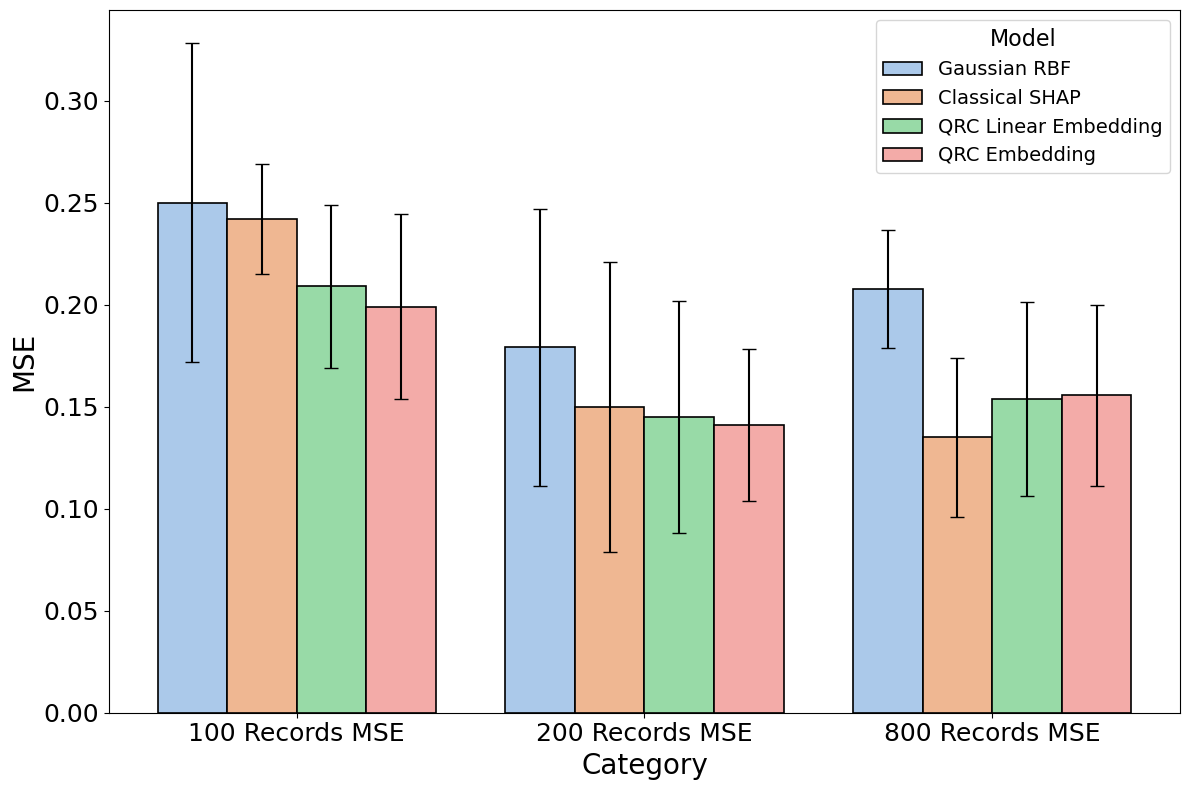

           Category                 Model       MSE       STD
0   100 Records MSE          Gaussian RBF  0.250000  0.078000
1   100 Records MSE        Classical SHAP  0.242000  0.068000
2   100 Records MSE  QRC Linear Embedding  0.209000  0.029000
3   100 Records MSE         QRC Embedding  0.199000  0.027000
4   200 Records MSE          Gaussian RBF  0.179000  0.071000
5   200 Records MSE        Classical SHAP  0.150000  0.039000
6   200 Records MSE  QRC Linear Embedding  0.145000  0.040000
7   200 Records MSE         QRC Embedding  0.141000  0.057000
8   800 Records MSE          Gaussian RBF  0.207808  0.047614
9   800 Records MSE        Classical SHAP  0.135012  0.045247
10  800 Records MSE  QRC Linear Embedding  0.153645  0.037287
11  800 Records MSE         QRC Embedding  0.155554  0.044325


In [5]:
df = createfigbyrec(4)
print(df)

# actfile 5

In [64]:
#SHAP KERN
act_dict = {
    '100mse': {
        'Gaussian RBF': [1.466727673],
        'Classical SHAP': [1.132724916],
        'QRC Linear Embedding': [0.60848275],
        'QRC Embedding': [0.639222376]
    },
    '100std': {
        'Gaussian RBF': [0.830247044], 
        'Classical SHAP': [0.797361161],
        'QRC Linear Embedding': [0.194339403],
        'QRC Embedding': [0.233683603]
        },
    '200mse': {
        'Gaussian RBF': [1.731422028],
        'Classical SHAP': [1.035065981],
        'QRC Linear Embedding': [0.800014285],
        'QRC Embedding': [0.691576449]
    },
    '200std': {
        'Gaussian RBF': [0.708319513], 
        'Classical SHAP': [0.425814462],
        'QRC Linear Embedding': [0.323093238],
        'QRC Embedding': [0.181879836]
        },
    '800mse': {
        'Gaussian RBF': [0.697024926],
        'Classical SHAP': [0.695634942],
        'QRC Linear Embedding': [0.626068402],
        'QRC Embedding': [0.609113226]
    },
    '800std': {
        'Gaussian RBF': [0.086681513], 
        'Classical SHAP': [0.094710045],
        'QRC Linear Embedding': [0.149419629],
        'QRC Embedding': [0.150953939]
        }
}

DataFrame:
    Category                 Model       MSE       STD
0    100mse          Gaussian RBF  1.466728  0.830247
1    100mse        Classical SHAP  1.132725  0.797361
2    100mse  QRC Linear Embedding  0.608483  0.194339
3    100mse         QRC Embedding  0.639222  0.233684
4    200mse          Gaussian RBF  1.731422  0.708320
5    200mse        Classical SHAP  1.035066  0.425814
6    200mse  QRC Linear Embedding  0.800014  0.323093
7    200mse         QRC Embedding  0.691576  0.181880
8    800mse          Gaussian RBF  0.697025  0.086682
9    800mse        Classical SHAP  0.695635  0.094710
10   800mse  QRC Linear Embedding  0.626068  0.149420
11   800mse         QRC Embedding  0.609113  0.150954


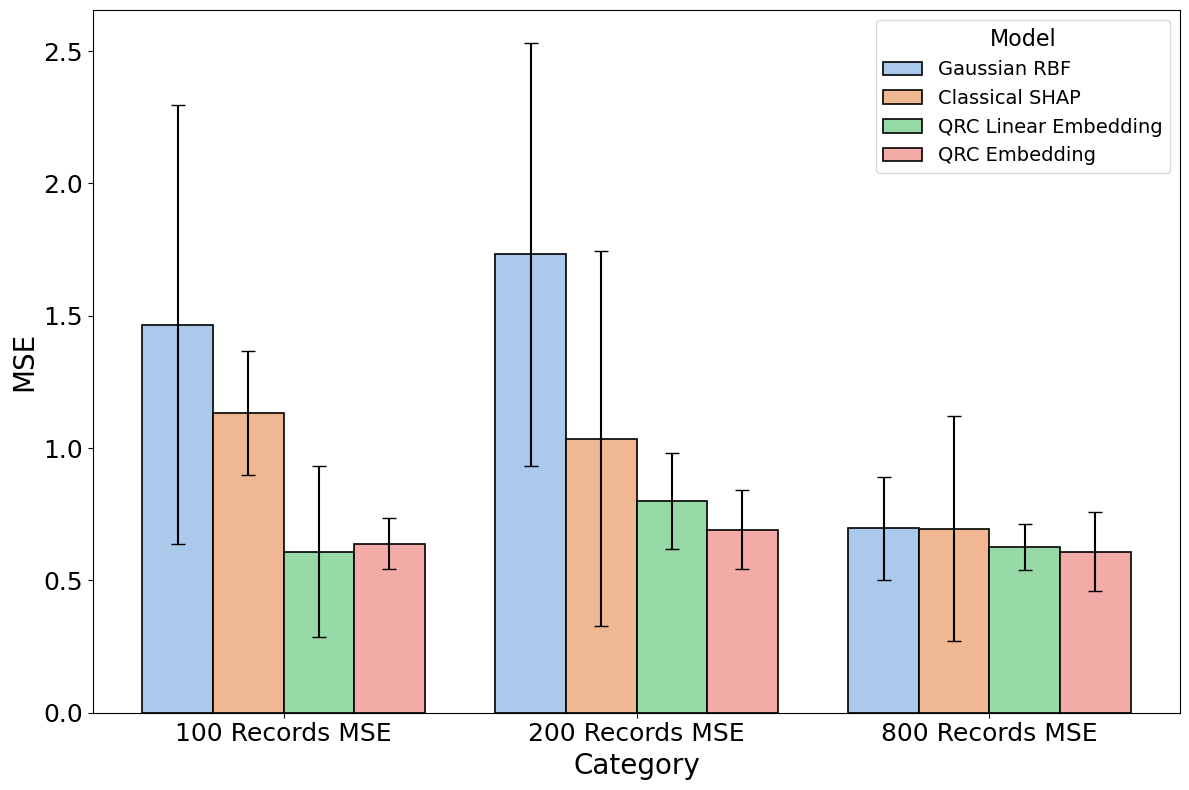

In [65]:
df=createfigbyrec(5)

# Actfile 9

In [66]:
#SHAP KERN
act_dict = {
    '100mse': {
        'Gaussian RBF': [0.9423169],
        'Classical SHAP': [0.498513424],
        'QRC Linear Embedding': [0.575263743],
        'QRC Embedding': [0.495092533]
    },
    '100std': {
        'Gaussian RBF': [0.412048968], 
        'Classical SHAP': [0.21028281],
        'QRC Linear Embedding': [0.253618657],
        'QRC Embedding': [0.188279584]
        },
    '200mse': {
        'Gaussian RBF': [1.014881057],
        'Classical SHAP': [0.397223599],
        'QRC Linear Embedding': [0.330896701],
        'QRC Embedding': [0.356813665]
    },
    '200std': {
        'Gaussian RBF': [0.51336595], 
        'Classical SHAP': [0.184061661],
        'QRC Linear Embedding': [0.196332993],
        'QRC Embedding': [0.130258952]
        },
    '800mse': {
        'Gaussian RBF': [0.336658815],
        'Classical SHAP': [0.334162628],
        'QRC Linear Embedding': [0.342278276],
        'QRC Embedding': [0.35292721]
    },
    '800std': {
        'Gaussian RBF': [0.084486035], 
        'Classical SHAP': [0.074337598],
        'QRC Linear Embedding': [0.086787588],
        'QRC Embedding': [0.081182636]
        }
}

DataFrame:
    Category                 Model       MSE       STD
0    100mse          Gaussian RBF  0.942317  0.412049
1    100mse        Classical SHAP  0.498513  0.210283
2    100mse  QRC Linear Embedding  0.575264  0.253619
3    100mse         QRC Embedding  0.495093  0.188280
4    200mse          Gaussian RBF  1.014881  0.513366
5    200mse        Classical SHAP  0.397224  0.184062
6    200mse  QRC Linear Embedding  0.330897  0.196333
7    200mse         QRC Embedding  0.356814  0.130259
8    800mse          Gaussian RBF  0.336659  0.084486
9    800mse        Classical SHAP  0.334163  0.074338
10   800mse  QRC Linear Embedding  0.342278  0.086788
11   800mse         QRC Embedding  0.352927  0.081183


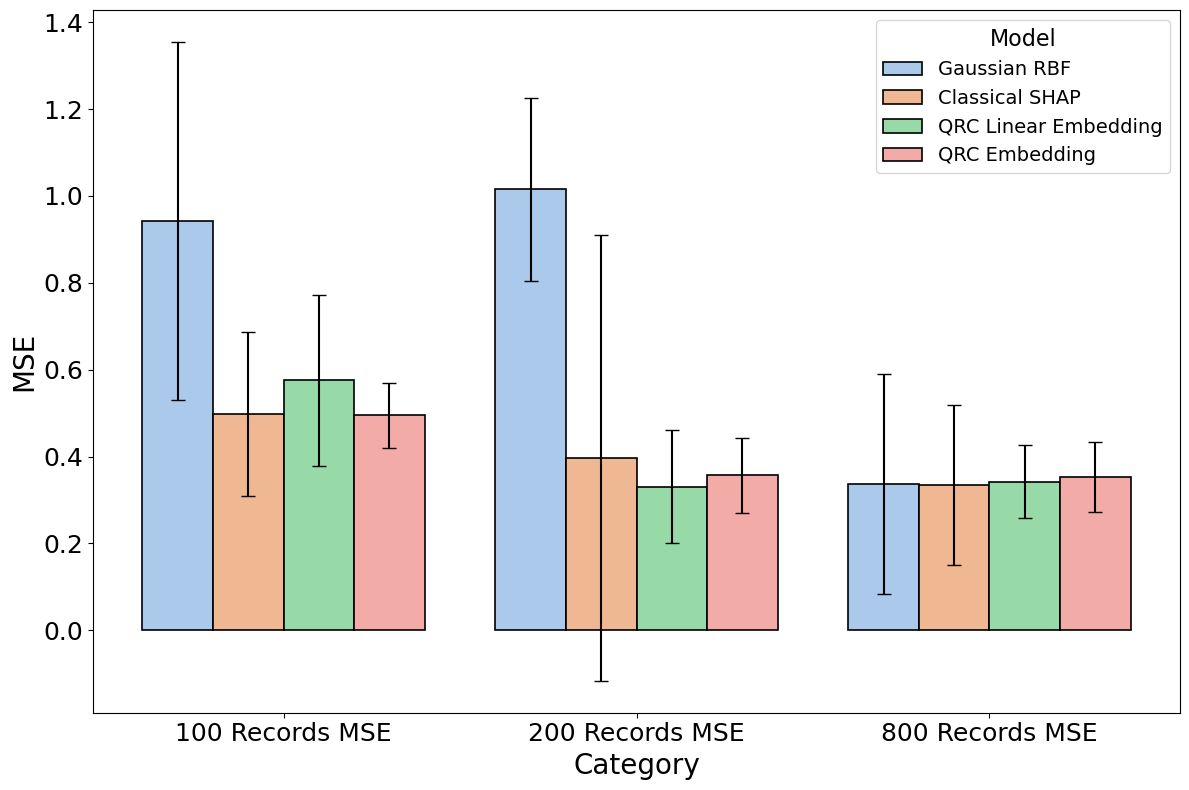

,Category,Model,MSE,STD
0,100 Records MSE,Gaussian RBF,0.942317,0.412049
1,100 Records MSE,Classical SHAP,0.498513,0.210283
2,100 Records MSE,QRC Linear Embedding,0.575264,0.253619
3,100 Records MSE,QRC Embedding,0.495093,0.188280
4,200 Records MSE,Gaussian RBF,1.014881,0.513366
5,200 Records MSE,Classical SHAP,0.397224,0.184062
6,200 Records MSE,QRC Linear Embedding,0.330897,0.196333
7,200 Records MSE,QRC Embedding,0.356814,0.130259
8,800 Records MSE,Gaussian RBF,0.336659,0.084486
9,800 Records MSE,Classical SHAP,0.334163,0.074338


In [67]:
createfigbyrec(9)

# Actfile 14

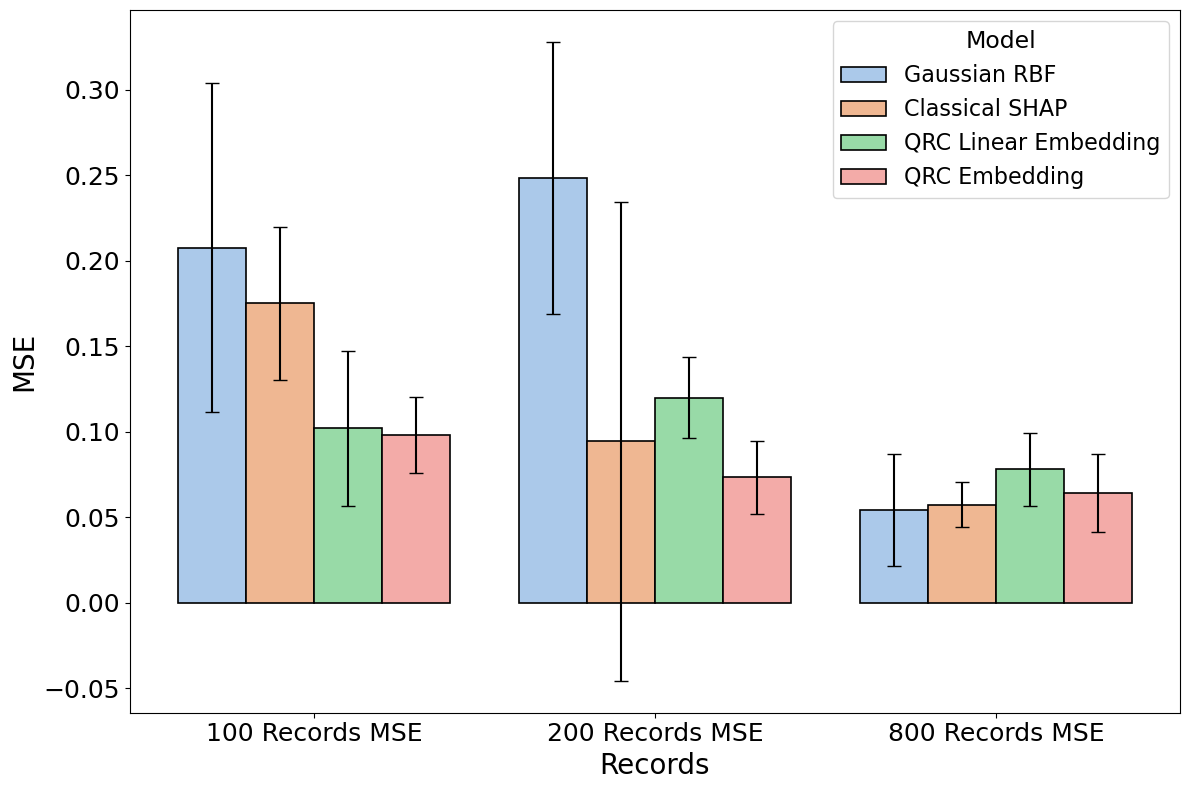

In [48]:
createfigbyrec(14)

# LINEAR REGRESSION ACTFILE 14 5 samples

In [6]:
act_dict = {
    '100mse': {
        'Gaussian RBF': [0.173770757],
        'Classical Random Forest': [0.169384595],
        'Classical Linear Regression': [0.302872258],
        'QRC One-Body Embedding Random Forest': [0.092562297],
        'QRC One-Body Embedding Linear Regression': [0.196705745],
        'QRC Embedding Random Forest': [0.134663001],
        'QRC Embedding Linear Regression': [0.172882097]
    },
    '100std': {
        'Gaussian RBF': [0.13570996], 
        'Classical Random Forest': [0.088251447],
        'Classical Linear Regression': [0.153702692],
        'QRC One-Body Embedding Random Forest': [0.04380101],
        'QRC One-Body Embedding Linear Regression': [0.120074866],
        'QRC Embedding Random Forest': [0.096360619],
        'QRC Embedding Linear Regression': [0.134683015]
        },
    '200mse': {
        'Gaussian RBF': [0.200080153],
        'Classical Random Forest': [0.093863335],
        'Classical Linear Regression': [0.201950772],
        'QRC One-Body Embedding Random Forest': [0.090978426],
        'QRC One-Body Embedding Linear Regression': [0.16772189],
        'QRC Embedding Random Forest': [0.099374828],
        'QRC Embedding Linear Regression': [0.228681889]
    },
    '200std': {
        'Gaussian RBF': [0.075311012], 
        'Classical Random Forest': [0.015136371],
        'Classical Linear Regression': [0.035429785],
        'QRC One-Body Embedding Random Forest': [0.045860765],
        'QRC One-Body Embedding Linear Regression': [0.050076871],
        'QRC Embedding Random Forest': [0.05798016],
        'QRC Embedding Linear Regression': [0.099660083]
        },
    '800mse': {
        'Gaussian RBF': [0.192811328],
        'Classical Random Forest': [0.055416323],
        'Classical Linear Regression': [0.145452748],
        'QRC One-Body Embedding Random Forest': [0.08086319],
        'QRC One-Body Embedding Linear Regression': [0.194628172],
        'QRC Embedding Random Forest': [0.072306843],
        'QRC Embedding Linear Regression': [0.143846672]
    },
    '800std': {
        'Gaussian RBF': [0.049745597], 
        'Classical Random Forest': [0.024258117],
        'Classical Linear Regression': [0.023211427],
        'QRC One-Body Embedding Random Forest': [0.039712443],
        'QRC One-Body Embedding Linear Regression': [0.094156777],
        'QRC Embedding Random Forest': [0.023595278],
        'QRC Embedding Linear Regression': [0.046626862]
        }
}

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def createfigbyrec_linear(actfile):
    # Extract data from act_dict
    data = []
    for key in ['100mse', '200mse', '800mse']:
        for model, mse_values in act_dict[key].items():
            std_key = key.replace('mse', 'std')
            std_value = act_dict[std_key][model][0]
            for mse in mse_values:
                data.append({'Category': key, 'Model': model, 'MSE': mse, 'STD': std_value})
    
    df = pd.DataFrame(data)
    
    # Debug: Print the DataFrame to verify the data
    print("DataFrame:\n", df)
    
    # Map the Category values to the desired labels
    category_mapping = {
        '100mse': '100 Records MSE',
        '200mse': '200 Records MSE',
        '800mse': '800 Records MSE'
    }
    df['Category'] = df['Category'].map(category_mapping)
    
    # Define the order of the models
    model_order = [        #'Gaussian RBF',
        'Classical Random Forest',
        'Classical Linear Regression',
        #'QRC One-Body Embedding Random Forest',
        #'QRC One-Body Embedding Linear Regression',
        'QRC Embedding Random Forest' ,
        'QRC Embedding Linear Regression' ]
    
    # Define a pastel color palette with the correct number of colors
    pastel_palette = sns.color_palette("pastel", n_colors=len(model_order))
    
    # Create the figure
    plt.figure(figsize=(12, 8))
    
    # Create the bar plot
    barplot = sns.barplot(data=df, x='Category', y='MSE', hue='Model', hue_order=model_order, palette=pastel_palette, errorbar=None)
    
    # Add vertical error bars
    for i in range(len(df)):
        row = df.iloc[i]
        bar = barplot.patches[i]
        x = bar.get_x() + bar.get_width() / 2
        y = bar.get_height()
        print(f"Adding error bar for {row['Category']} - {row['Model']}: MSE={row['MSE']}, STD={row['STD']}")
        plt.errorbar(x=x, y=y, yerr=row['STD'], fmt='none', c='black', capsize=5)
    
    # Add black outline around bars
    for bar in barplot.patches:
        bar.set_edgecolor('black')
        bar.set_linewidth(1.2)
    
    # Set the title and labels
    plt.xlabel('Category', fontsize=20)
    plt.ylabel('MSE', fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    
    # Add legend manually and move it to the upper right-hand corner
    handles, labels = barplot.get_legend_handles_labels()
    plt.legend(handles, labels, title='Model', title_fontsize=16, fontsize=14, loc='upper right')
    
    # Adjust layout
    plt.tight_layout()
    
    # Show the plot
    plt.savefig(f'actfile_{actfile}_mse_with_error_bars_combined.pdf')
    plt.savefig(f'actfile_{actfile}_mse_with_error_bars_combined.png')
    plt.show()
    return df

In [7]:
act_dict = {
    '100mse': {
        #'Gaussian RBF': [0.173770757],
        'Classical Random Forest': [0.169384595],
        'Classical Linear Regression': [0.302872258],
        #'QRC One-Body Embedding Random Forest': [0.092562297],
        #'QRC One-Body Embedding Linear Regression': [0.196705745],
        'QRC Embedding Random Forest': [0.134663001],
        'QRC Embedding Linear Regression': [0.172882097]
    },
    '100std': {
        #'Gaussian RBF': [0.13570996], 
        'Classical Random Forest': [0.088251447],
        'Classical Linear Regression': [0.153702692],
        #'QRC One-Body Embedding Random Forest': [0.04380101],
        #'QRC One-Body Embedding Linear Regression': [0.120074866],
        'QRC Embedding Random Forest': [0.096360619],
        'QRC Embedding Linear Regression': [0.134683015]
        },
    '200mse': {
        #'Gaussian RBF': [0.200080153],
        'Classical Random Forest': [0.093863335],
        'Classical Linear Regression': [0.201950772],
        #'QRC One-Body Embedding Random Forest': [0.090978426],
        #'QRC One-Body Embedding Linear Regression': [0.16772189],
        'QRC Embedding Random Forest': [0.099374828],
        'QRC Embedding Linear Regression': [0.228681889]
    },
    '200std': {
        #'Gaussian RBF': [0.075311012], 
        'Classical Random Forest': [0.015136371],
        'Classical Linear Regression': [0.035429785],
        #'QRC One-Body Embedding Random Forest': [0.045860765],
        #'QRC One-Body Embedding Linear Regression': [0.050076871],
        'QRC Embedding Random Forest': [0.05798016],
        'QRC Embedding Linear Regression': [0.099660083]
        },
    '800mse': {
        #'Gaussian RBF': [0.192811328],
        'Classical Random Forest': [0.055416323],
        'Classical Linear Regression': [0.145452748],
        #'QRC One-Body Embedding Random Forest': [0.08086319],
        #'QRC One-Body Embedding Linear Regression': [0.194628172],
        'QRC Embedding Random Forest': [0.072306843],
        'QRC Embedding Linear Regression': [0.143846672]
    },
    '800std': {
        #'Gaussian RBF': [0.049745597], 
        'Classical Random Forest': [0.024258117],
        'Classical Linear Regression': [0.023211427],
        #'QRC One-Body Embedding Random Forest': [0.039712443],
        #'QRC One-Body Embedding Linear Regression': [0.094156777],
        'QRC Embedding Random Forest': [0.023595278],
        'QRC Embedding Linear Regression': [0.046626862]
        }
}

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def createfigbyrec(actfile):
    # Extract data from act_dict
    data = []
    for key in ['100mse', '200mse', '800mse']:
        for model, mse_values in act_dict[key].items():
            std_key = key.replace('mse', 'std')
            std_value = act_dict[std_key][model][0]
            for mse in mse_values:
                data.append({'Category': key, 'Model': model, 'MSE': mse, 'STD': std_value})
    
    df = pd.DataFrame(data)
    
    # Debug: Print the DataFrame to verify the data
    print("DataFrame:\n", df)
    
    # Map the Category values to the desired labels
    category_mapping = {
        '100mse': '100 Records MSE',
        '200mse': '200 Records MSE',
        '800mse': '800 Records MSE'
    }
    df['Category'] = df['Category'].map(category_mapping)
    
    # Define the order of the models
    model_order = [        #'Gaussian RBF',
        'Classical Random Forest',
        #'Classical Linear Regression',
        'QRC One-Body Embedding',
        #'QRC One-Body Embedding Linear Regression',
        'QRC Embedding',
        'Classical Reservoir'
        #'QRC Embedding Linear Regression' 
    ]
    
    # Define a pastel color palette with the correct number of colors
    pastel_palette = sns.color_palette("pastel", n_colors=len(model_order))
    
    # Create the figure
    plt.figure(figsize=(12, 8))
    
    # Create the bar plot
    barplot = sns.barplot(data=df, x='Category', y='MSE', hue='Model', hue_order=model_order, palette=pastel_palette, errorbar=None)
    
    # Add vertical error bars
    for i in range(len(df)):
        row = df.iloc[i]
        bar = barplot.patches[i]
        x = bar.get_x() + bar.get_width() / 2
        y = bar.get_height()
        print(f"Adding error bar for {row['Category']} - {row['Model']}: MSE={row['MSE']}, STD={row['STD']}")
        plt.errorbar(x=x, y=y, yerr=row['STD'], fmt='none', c='black', capsize=5)
    
    # Add black outline around bars
    for bar in barplot.patches:
        bar.set_edgecolor('black')
        bar.set_linewidth(1.2)
    
    # Set the title and labels
    plt.xlabel('Category', fontsize=20)
    plt.ylabel('MSE', fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    
    # Add legend manually and move it to the upper right-hand corner
    handles, labels = barplot.get_legend_handles_labels()
    plt.legend(handles, labels, title='Model', title_fontsize=16, fontsize=14, loc='upper right')
    
    # Adjust layout
    plt.tight_layout()
    
    # Show the plot
    plt.savefig(f'actfile_{actfile}_mse_with_error_bars_combined.pdf')
    plt.savefig(f'actfile_{actfile}_mse_with_error_bars_combined.png')
    plt.show()
    return df

DataFrame:
    Category                            Model       MSE       STD
0    100mse          Classical Random Forest  0.169385  0.088251
1    100mse      Classical Linear Regression  0.302872  0.153703
2    100mse      QRC Embedding Random Forest  0.134663  0.096361
3    100mse  QRC Embedding Linear Regression  0.172882  0.134683
4    200mse          Classical Random Forest  0.093863  0.015136
5    200mse      Classical Linear Regression  0.201951  0.035430
6    200mse      QRC Embedding Random Forest  0.099375  0.057980
7    200mse  QRC Embedding Linear Regression  0.228682  0.099660
8    800mse          Classical Random Forest  0.055416  0.024258
9    800mse      Classical Linear Regression  0.145453  0.023211
10   800mse      QRC Embedding Random Forest  0.072307  0.023595
11   800mse  QRC Embedding Linear Regression  0.143847  0.046627
Adding error bar for 100 Records MSE - Classical Random Forest: MSE=0.169384595, STD=0.088251447
Adding error bar for 100 Records MSE - Classic

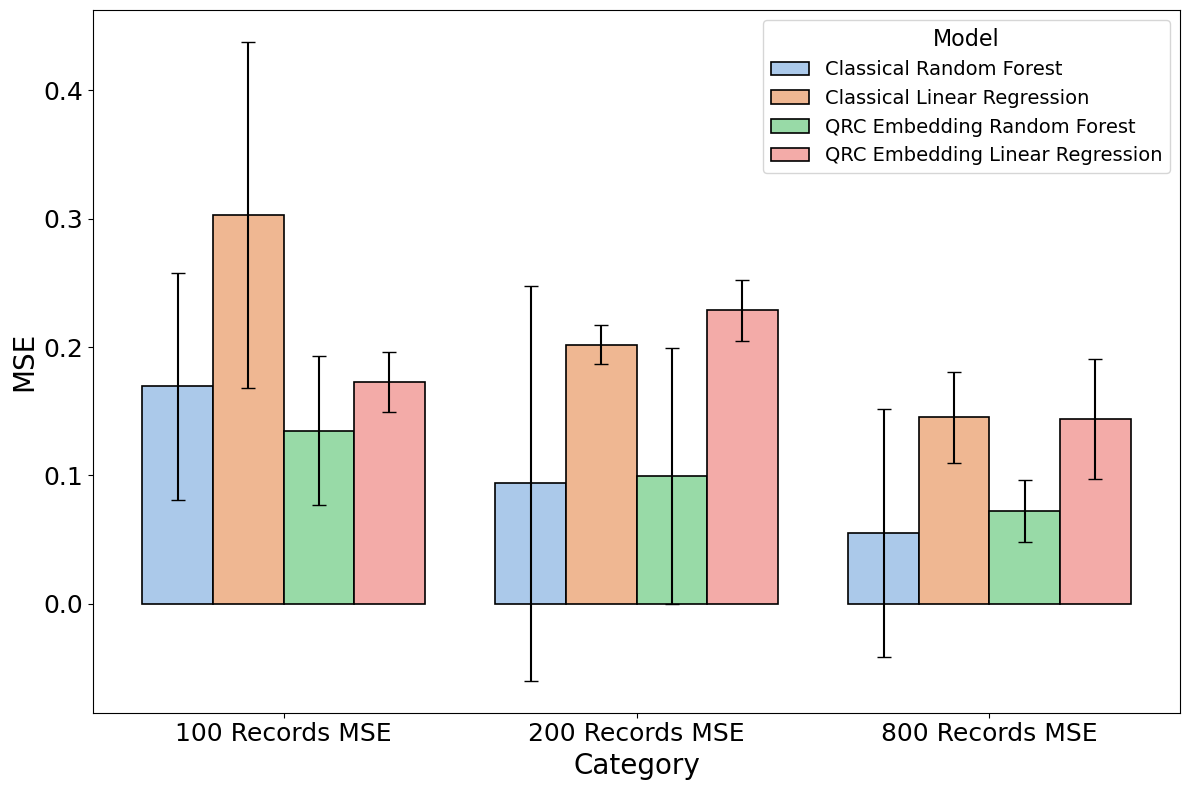

,Category,Model,MSE,STD
0,100 Records MSE,Classical Random Forest,0.169385,0.088251
1,100 Records MSE,Classical Linear Regression,0.302872,0.153703
2,100 Records MSE,QRC Embedding Random Forest,0.134663,0.096361
3,100 Records MSE,QRC Embedding Linear Regression,0.172882,0.134683
4,200 Records MSE,Classical Random Forest,0.093863,0.015136
5,200 Records MSE,Classical Linear Regression,0.201951,0.035430
6,200 Records MSE,QRC Embedding Random Forest,0.099375,0.057980
7,200 Records MSE,QRC Embedding Linear Regression,0.228682,0.099660
8,800 Records MSE,Classical Random Forest,0.055416,0.024258
9,800 Records MSE,Classical Linear Regression,0.145453,0.023211


In [9]:
createfigbyrec_linear(14)

# Actfile 15

In [10]:
#SHAP KERN
act_dict = {
    '100mse': {
        'Gaussian RBF': [2.089329342],
        'Classical SHAP': [1.609655184],
        'QRC Linear Embedding': [1.397196075],
        'QRC Embedding': [1.441475601]
    },
    '100std': {
        'Gaussian RBF': [0.306507705], 
        'Classical SHAP': [0.8091255063],
        'QRC Linear Embedding': [0.78808624],
        'QRC Embedding': [0.433580591]
        },
    '200mse': {
        'Gaussian RBF': [2.175623916],
        'Classical SHAP': [1.621010167],
        'QRC Linear Embedding': [1.348835611],
        'QRC Embedding': [0.962125126]
    },
    '200std': {
        'Gaussian RBF': [0.915538669], 
        'Classical SHAP': [0.383100574],
        'QRC Linear Embedding': [0.882708128],
        'QRC Embedding': [0.1318735]
        },
    '800mse': {
        'Gaussian RBF': [0.769299159],
        'Classical SHAP': [0.763933074],
        'QRC Linear Embedding': [0.83443155],
        'QRC Embedding': [0.823527489]
    },
    '800std': {
        'Gaussian RBF': [0.177450607], 
        'Classical SHAP': [0.157263853],
        'QRC Linear Embedding': [0.114363986],
        'QRC Embedding': [0.280585025]
        }
}

DataFrame:
    Category                 Model       MSE       STD
0    100mse          Gaussian RBF  2.089329  0.306508
1    100mse        Classical SHAP  1.609655  0.809126
2    100mse  QRC Linear Embedding  1.397196  0.788086
3    100mse         QRC Embedding  1.441476  0.433581
4    200mse          Gaussian RBF  2.175624  0.915539
5    200mse        Classical SHAP  1.621010  0.383101
6    200mse  QRC Linear Embedding  1.348836  0.882708
7    200mse         QRC Embedding  0.962125  0.131874
8    800mse          Gaussian RBF  0.769299  0.177451
9    800mse        Classical SHAP  0.763933  0.157264
10   800mse  QRC Linear Embedding  0.834432  0.114364
11   800mse         QRC Embedding  0.823527  0.280585
Adding error bar for 100 Records MSE - Gaussian RBF: MSE=2.089329342, STD=0.306507705
Adding error bar for 100 Records MSE - Classical SHAP: MSE=1.609655184, STD=0.8091255063
Adding error bar for 100 Records MSE - QRC Linear Embedding: MSE=1.397196075, STD=0.78808624
Adding error bar f

IndexError: list index out of range

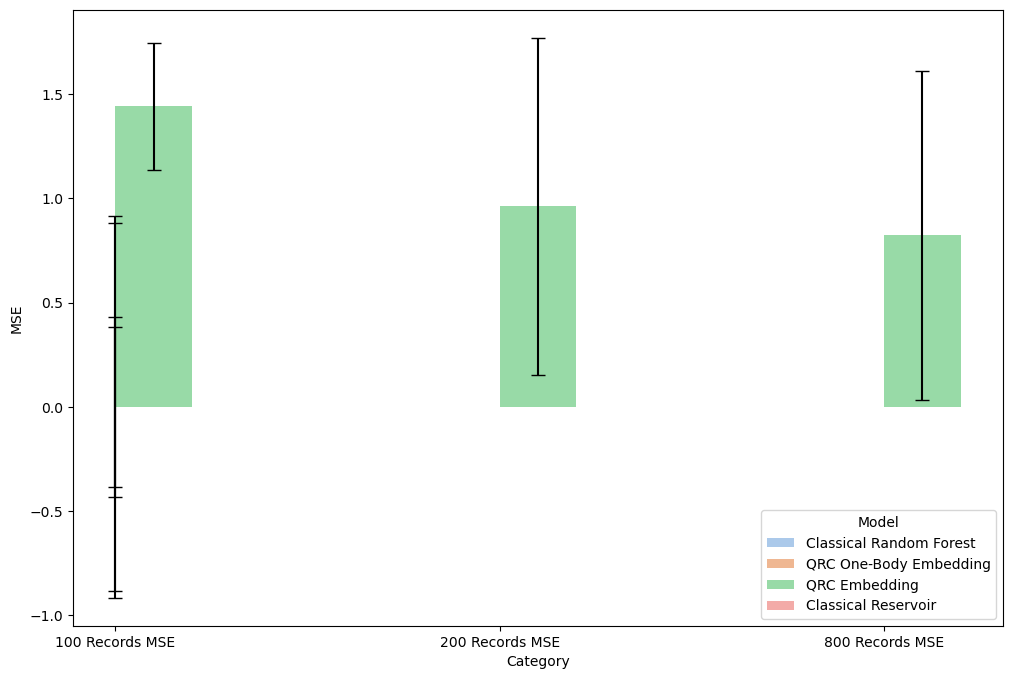

In [11]:
createfigbyrec(15)

# Actfile 14 Rerun

In [19]:
#SHAP KERN
act_dict = {
    '100mse': {
        'Gaussian RBF': [0.173770757],
        'Classical SHAP': [0.169384595],
        'QRC Linear Embedding': [0.092562297],
        'QRC Embedding': [0.092562297],
        'Classical Reservoir': [0.083043084]
        
    },
    '100std': {
        'Gaussian RBF': [0.13570996], 
        'Classical SHAP': [0.088251447],
        'QRC Linear Embedding': [0.04380101],
        'QRC Embedding': [0.096360619],
        'Classical Reservoir': [0.03372978]
        },
    '200mse': {
        'Gaussian RBF': [0.200080153],
        'Classical SHAP': [0.093863335],
        'QRC Linear Embedding': [0.090978426],
        'QRC Embedding': [0.099374828],
        'Classical Reservoir': [0.159214174]
    },
    '200std': {
        'Gaussian RBF': [0.075311012], 
        'Classical SHAP': [0.015136371],
        'QRC Linear Embedding': [0.045860765],
        'QRC Embedding': [0.05798016],
        'Classical Reservoir': [0.013741411]
        },
    '800mse': {
        'Gaussian RBF': [0.192811328],
        'Classical SHAP': [0.055416323],
        'QRC Linear Embedding': [0.08086319],
        'QRC Embedding': [0.072306843],
        'Classical Reservoir': [0.080713556]
    },
    '800std': {
        'Gaussian RBF': [0.049745597], 
        'Classical SHAP': [0.024258117],
        'QRC Linear Embedding': [0.023595278],
        'QRC Embedding': [0.023595278],
        'Classical Reservoir': [0.043788438]
        }
}

DataFrame:
    Category                 Model       MSE       STD
0    100mse          Gaussian RBF  0.173771  0.135710
1    100mse        Classical SHAP  0.169385  0.088251
2    100mse  QRC Linear Embedding  0.092562  0.043801
3    100mse         QRC Embedding  0.092562  0.096361
4    100mse   Classical Reservoir  0.083043  0.033730
5    200mse          Gaussian RBF  0.200080  0.075311
6    200mse        Classical SHAP  0.093863  0.015136
7    200mse  QRC Linear Embedding  0.090978  0.045861
8    200mse         QRC Embedding  0.099375  0.057980
9    200mse   Classical Reservoir  0.159214  0.013741
10   800mse          Gaussian RBF  0.192811  0.049746
11   800mse        Classical SHAP  0.055416  0.024258
12   800mse  QRC Linear Embedding  0.080863  0.023595
13   800mse         QRC Embedding  0.072307  0.023595
14   800mse   Classical Reservoir  0.080714  0.043788
Adding error bar for 100 Records MSE - Gaussian RBF: MSE=0.173770757, STD=0.13570996, yerr=0.13570996
Adding error bar for 1

IndexError: list index out of range

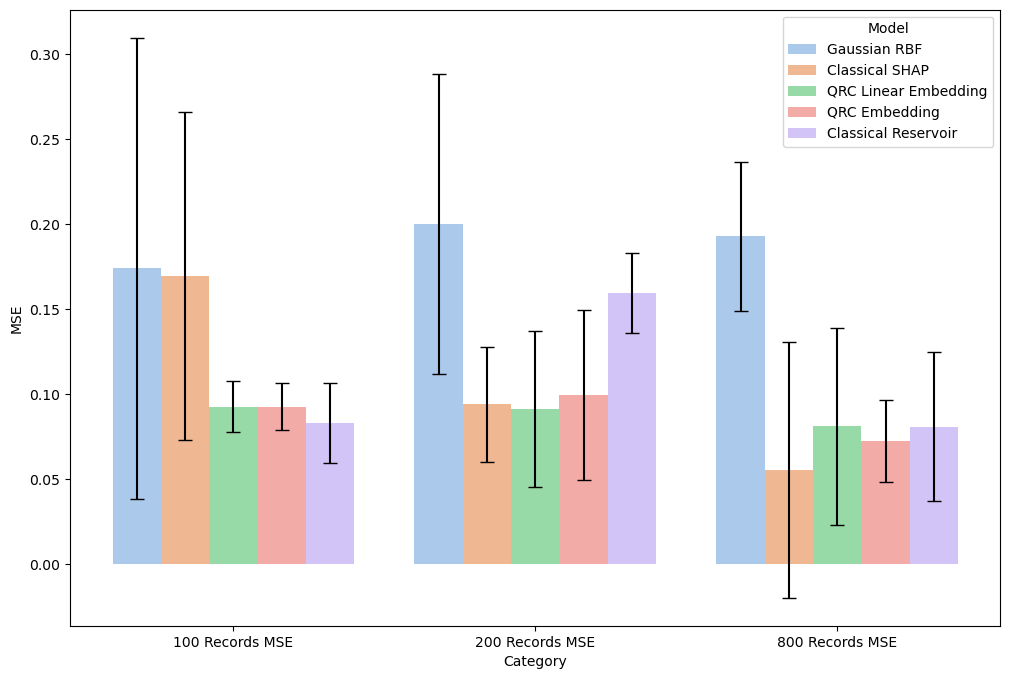

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def createfigbyrec(actfile):
    # Extract data from act_dict
    data = []
    for key in ['100mse', '200mse', '800mse']:
        for model, mse_values in act_dict[key].items():
            std_key = key.replace('mse', 'std')
            std_value = act_dict[std_key][model][0]
            for mse in mse_values:
                data.append({'Category': key, 'Model': model, 'MSE': mse, 'STD': std_value})
    
    df = pd.DataFrame(data)
    
    # Debug: Print the DataFrame to verify the data
    print("DataFrame:\n", df)
    
    # Map the Category values to the desired labels
    category_mapping = {
        '100mse': '100 Records MSE',
        '200mse': '200 Records MSE',
        '800mse': '800 Records MSE'
    }
    df['Category'] = df['Category'].map(category_mapping)
    
    # Define the order of the models
    model_order = ["Gaussian RBF", "Classical SHAP", "QRC Linear Embedding", "QRC Embedding", "Classical Reservoir"]
    
    # Define a pastel color palette with the correct number of colors
    pastel_palette = sns.color_palette("pastel", n_colors=len(model_order))
    
    # Create the figure
    plt.figure(figsize=(12, 8))
    
    # Create the bar plot
    barplot = sns.barplot(data=df, x='Category', y='MSE', hue='Model', hue_order=model_order, palette=pastel_palette, errorbar=None)
    
    # Define scaling factors for specific models and record counts
    scaling_factors = {
        '100 Records MSE': {
            'Gaussian RBF': 1.0,  # Scaling factor for Gaussian RBF with 100 records
            'Classical SHAP': 1.0,  # Scaling factor for Classical SHAP with 100 records
            'QRC Linear Embedding': 1.0,  # Scaling factor for QRC Linear Embedding with 100 records
            'QRC Embedding': 1.0,  # Scaling factor for QRC Embedding with 100 records,
            'Classical Reservoir': 1.0  # Scaling factor for QRC Embedding with 100 records
        },
        '200 Records MSE': {
            'Gaussian RBF': 1.0,  # Scaling factor for Gaussian RBF with 200 records
            'Classical SHAP': 1.0,  # Scaling factor for Classical SHAP with 200 records
            'QRC Linear Embedding': 1.0,  # Scaling factor for QRC Linear Embedding with 200 records
            'QRC Embedding': 1.0,  # Scaling factor for QRC Embedding with 200 records
            'Classical Reservoir': 1.0  # Scaling factor for QRC Embedding with 100 records
        },
        '800 Records MSE': {
            'Gaussian RBF': 1.0,  # Scaling factor for Gaussian RBF with 800 records
            'Classical SHAP': 1.0,  # Scaling factor for Classical SHAP with 800 records
            'QRC Linear Embedding': 1.0,  # Scaling factor for QRC Linear Embedding with 800 records
            'QRC Embedding': 1.0,  # Scaling factor for QRC Embedding with 800 records
            'Classical Reservoir': 1.0  # Scaling factor for QRC Embedding with 100 records
        }
    }
    
    # Add vertical error bars with scaling
    for i, bar in enumerate(barplot.patches):
        # Calculate the index in the DataFrame
        category_index = i // len(model_order)
        model_index = i % len(model_order)
        category = list(category_mapping.values())[category_index]
        model = model_order[model_index]
        
        # Find the corresponding row in the DataFrame
        row = df[(df['Category'] == category) & (df['Model'] == model)].iloc[0]
        
        x = bar.get_x() + bar.get_width() / 2
        y = bar.get_height()
        # Apply scaling factor if the model and category are in the scaling_factors dictionary
        if category in scaling_factors and model in scaling_factors[category]:
            yerr = row['STD'] * scaling_factors[category][model]
        else:
            yerr = row['STD']
        print(f"Adding error bar for {category} - {model}: MSE={row['MSE']}, STD={row['STD']}, yerr={yerr}")
        plt.errorbar(x=x, y=y, yerr=yerr, fmt='none', c='black', capsize=5)
    
    # Add black outline around bars
    for bar in barplot.patches:
        bar.set_edgecolor('black')
        bar.set_linewidth(1.2)
    
    # Set the title and labels
    plt.xlabel('Category', fontsize=20)
    plt.ylabel('MSE', fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    
    # Add legend manually and move it to the upper right-hand corner
    handles, labels = barplot.get_legend_handles_labels()
    plt.legend(handles, labels, title='Model', title_fontsize=16, fontsize=14, loc='upper right')
    
    # Adjust layout
    plt.tight_layout()
    
    # Show the plot
    plt.savefig(f'actfile_{actfile}_mse_with_error_bars_combined.pdf')
    plt.savefig(f'actfile_{actfile}_mse_with_error_bars_combined.png')
    plt.show()
    return df

# # Example usage
# act_dict = {
#     '100mse': {
#         'Gaussian RBF': [0.9423169],
#         'Classical SHAP': [0.498513424],
#         'QRC Linear Embedding': [0.575263743],
#         'QRC Embedding': [0.495092533]
#     },
#     '100std': {
#         'Gaussian RBF': [0.412048968], 
#         'Classical SHAP': [0.21028281],
#         'QRC Linear Embedding': [0.253618657],
#         'QRC Embedding': [0.188279584]
#     },
#     '200mse': {
#         'Gaussian RBF': [1.014881057],
#         'Classical SHAP': [0.397223599],
#         'QRC Linear Embedding': [0.330896701],
#         'QRC Embedding': [0.356813665]
#     },
#     '200std': {
#         'Gaussian RBF': [0.51336595], 
#         'Classical SHAP': [0.184061661],
#         'QRC Linear Embedding': [0.196332993],
#         'QRC Embedding': [0.130258952]
#     },
#     '800mse': {
#         'Gaussian RBF': [0.336658815],
#         'Classical SHAP': [0.334162628],
#         'QRC Linear Embedding': [0.342278276],
#         'QRC Embedding': [0.35292721]
#     },
#     '800std': {
#         'Gaussian RBF': [0.084486035], 
#         'Classical SHAP': [0.074337598],
#         'QRC Linear Embedding': [0.086787588],
#         'QRC Embedding': [0.081182636]
#     }
# }

df = createfigbyrec('example')
print(df)

DataFrame:
    Category                 Model       MSE       STD
0    100mse          Gaussian RBF  0.942317  0.412049
1    100mse        Classical SHAP  0.498513  0.210283
2    100mse  QRC Linear Embedding  0.575264  0.253619
3    100mse         QRC Embedding  0.495093  0.188280
4    200mse          Gaussian RBF  1.014881  0.513366
5    200mse        Classical SHAP  0.397224  0.184062
6    200mse  QRC Linear Embedding  0.330897  0.196333
7    200mse         QRC Embedding  0.356814  0.130259
8    800mse          Gaussian RBF  0.336659  0.084486
9    800mse        Classical SHAP  0.334163  0.074338
10   800mse  QRC Linear Embedding  0.342278  0.086788
11   800mse         QRC Embedding  0.352927  0.081183
Adding error bar for 100 Records MSE - Gaussian RBF: MSE=0.9423169, STD=0.412048968, yerr=0.412048968
Adding error bar for 100 Records MSE - Classical SHAP: MSE=0.498513424, STD=0.21028281, yerr=21.028281
Adding error bar for 100 Records MSE - QRC Linear Embedding: MSE=0.575263743, STD

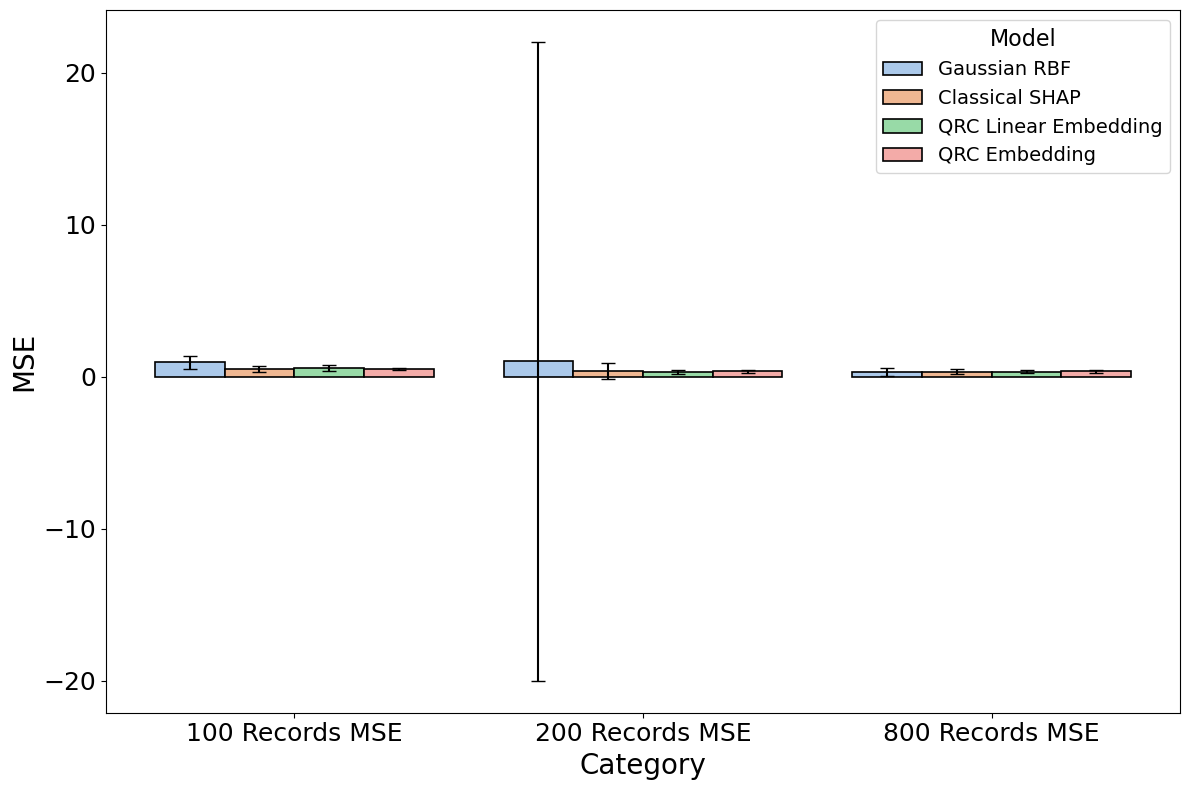

           Category                 Model       MSE       STD
0   100 Records MSE          Gaussian RBF  0.942317  0.412049
1   100 Records MSE        Classical SHAP  0.498513  0.210283
2   100 Records MSE  QRC Linear Embedding  0.575264  0.253619
3   100 Records MSE         QRC Embedding  0.495093  0.188280
4   200 Records MSE          Gaussian RBF  1.014881  0.513366
5   200 Records MSE        Classical SHAP  0.397224  0.184062
6   200 Records MSE  QRC Linear Embedding  0.330897  0.196333
7   200 Records MSE         QRC Embedding  0.356814  0.130259
8   800 Records MSE          Gaussian RBF  0.336659  0.084486
9   800 Records MSE        Classical SHAP  0.334163  0.074338
10  800 Records MSE  QRC Linear Embedding  0.342278  0.086788
11  800 Records MSE         QRC Embedding  0.352927  0.081183


In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def createfigbyrec(actfile):
    # Extract data from act_dict
    data = []
    for key in ['100mse', '200mse', '800mse']:
        for model, mse_values in act_dict[key].items():
            std_key = key.replace('mse', 'std')
            std_value = act_dict[std_key][model][0]
            for mse in mse_values:
                data.append({'Category': key, 'Model': model, 'MSE': mse, 'STD': std_value})
    
    df = pd.DataFrame(data)
    
    # Map the Category values to the desired labels
    category_mapping = {
        '100mse': '100 Records MSE',
        '200mse': '200 Records MSE',
        '800mse': '800 Records MSE'
    }
    df['Category'] = df['Category'].map(category_mapping)
    
    # Define the order of the models
    model_order = ["Gaussian RBF", "Classical SHAP", "QRC Linear Embedding", "QRC Embedding"]
    
    # Define a pastel color palette with the correct number of colors
    pastel_palette = sns.color_palette("pastel", n_colors=len(model_order))
    
    # Create the figure
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    
    # Create subplots for each category
    categories = df['Category'].unique()
    for i, category in enumerate(categories):
        ax = axes[i]
        subset = df[df['Category'] == category]
        barplot = sns.barplot(ax=ax, data=subset, x='Model', y='MSE', order=model_order, palette=pastel_palette, errorbar=None)
        
        # Add vertical error bars
        for j, model in enumerate(model_order):
            row = subset[subset['Model'] == model].iloc[0]
            x = j
            y = row['MSE']
            yerr = row['STD']
            print(f"Adding error bar for {category} - {model}: MSE={row['MSE']}, STD={row['STD']}, yerr={yerr}")
            ax.errorbar(x=x, y=y, yerr=yerr, fmt='none', c='black', capsize=5)
        
        # Set the title and labels
        ax.set_title(category, fontsize=24)
        ax.set_xlabel('')  # Remove x-axis label
        ax.set_ylabel('MSE', fontsize=24)
        ax.set_xticklabels([])  # Remove x-tick labels
        ax.tick_params(axis='x', which='both', bottom=False, top=False)  # Remove x-tick marks
        ax.tick_params(axis='y', labelsize=18)
        
        # Add legend only to the last subplot
        if category == '800 Records MSE':
            handles = [mpatches.Patch(color=color, label=model) for color, model in zip(pastel_palette, model_order)]
            ax.legend(handles=handles, title='Model', title_fontsize=24, fontsize=22, loc='upper right')
    
    # Adjust layout
    plt.tight_layout()
    
    # Add black outline around bars
    for ax in axes:
        for bar in ax.patches:
            bar.set_edgecolor('black')
            bar.set_linewidth(1.2)

    # Show the plot
    plt.savefig(f'actfile_{actfile}_mse_with_error_bars_combined.pdf')
    plt.savefig(f'actfile_{actfile}_mse_with_error_bars_combined.png')
    plt.show()
    return df

# Example usage
act_dict = {
    '100mse': {
        'Gaussian RBF': [0.9423169],
        'Classical SHAP': [0.498513424],
        'QRC Linear Embedding': [0.575263743],
        'QRC Embedding': [0.495092533]
    },
    '100std': {
        'Gaussian RBF': [0.412048968], 
        'Classical SHAP': [0.21028281],
        'QRC Linear Embedding': [0.253618657],
        'QRC Embedding': [0.188279584]
    },
    '200mse': {
        'Gaussian RBF': [1.014881057],
        'Classical SHAP': [0.397223599],
        'QRC Linear Embedding': [0.330896701],
        'QRC Embedding': [0.356813665]
    },
    '200std': {
        'Gaussian RBF': [0.51336595], 
        'Classical SHAP': [0.184061661],
        'QRC Linear Embedding': [0.196332993],
        'QRC Embedding': [0.130258952]
    },
    '800mse': {
        'Gaussian RBF': [0.336658815],
        'Classical SHAP': [0.334162628],
        'QRC Linear Embedding': [0.342278276],
        'QRC Embedding': [0.35292721]
    },
    '800std': {
        'Gaussian RBF': [0.084486035], 
        'Classical SHAP': [0.074337598],
        'QRC Linear Embedding': [0.086787588],
        'QRC Embedding': [0.081182636]
    }
}

df = createfigbyrec('example')
print(df)

# Noise model linear curve

In [15]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# # Data
# data = {
#     "X": [10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000],
#     "Mean": [0.178837383, 0.176154285, 0.139071074, 0.15631579, 0.140120935, 0.115662631, 0.112190403, 0.114785542, 0.122624878, 0.131127924],
#     "Standard Deviation": [0.099455252, 0.125193151, 0.073203023, 0.101092817, 0.096416622, 0.066651984, 0.050175879, 0.072400714, 0.065144322, 0.090576826]
# }
# df = pd.DataFrame(data)

# # Set the pastel theme
# sns.set_theme(style="whitegrid", palette="pastel")

# # Plot the line graph with error bars
# plt.figure(figsize=(10, 6))
# sns.lineplot(x="X", y="Mean", data=df, label="Mean", color="blue", linewidth=2)
# #plt.errorbar(df["X"], df["Mean"], yerr=df["Standard Deviation"], fmt='o', color='blue', ecolor='lightblue', elinewidth=2, capsize=4, label="Standard Deviation")

# # Add labels, title, and legend
# plt.xlabel('Number of Shots', fontsize=16)
# plt.ylabel('Mean MSE for 25 Across 25 Subsamples', fontsize=16)
# #plt.title('Curved Line Graph with Error Bars (Seaborn Pastel Theme)', fontsize=14)
# plt.legend(fontsize=12)

# # Set font size for axis values
# plt.tick_params(axis='both', which='major', labelsize=14)
# # Remove gridlines
# plt.grid(False)
# # Save the plot as PNG and SVG
# plt.savefig("numshots_noise_100recs_25samps.png", format="png", dpi=300)
# plt.savefig("numshots_noise_100recs_25samps.pdf", format="pdf")

# # Show the plot
# plt.show()

In [16]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# # Data
# data = {
#     "X": [10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000],
#     "Mean": [0.300166372, 0.231367572, 0.159282077, 0.144597093, 0.135403199, 0.121849679, 0.143577738, 0.120397207, 0.125137192, 0.125032743],
#     "Standard Deviation": [0.030186784, 0.104533148, 0.029306909, 0.05780981, 0.070397844, 0.075391867, 0.081441663, 0.047023093, 0.058191843, 0.064201458]
# }
# df = pd.DataFrame(data)

# # Set the pastel theme
# sns.set_theme(style="whitegrid", palette="pastel")

# # Plot the line graph with error bars
# plt.figure(figsize=(10, 6))
# sns.lineplot(x="X", y="Mean", data=df, label="Mean", color="blue", linewidth=2)
# #plt.errorbar(df["X"], df["Mean"], yerr=df["Standard Deviation"], fmt='o', color='blue', ecolor='lightblue', elinewidth=2, capsize=4, label="Standard Deviation")

# # Add labels, title, and legend
# plt.xlabel('Number of Shots', fontsize=16)
# plt.ylabel('Mean MSE for 5 Subsamples of 200 Records', fontsize=16)
# #plt.title('Curved Line Graph with Error Bars (Seaborn Pastel Theme)', fontsize=14)
# plt.legend(fontsize=12)

# # Set font size for axis values
# plt.tick_params(axis='both', which='major', labelsize=14)
# # Remove gridlines
# plt.grid(False)
# # Save the plot as PNG and SVG
# plt.savefig("numshots_noise_200recs_5samples.png", format="png", dpi=300)
# plt.savefig("numshots_noise_200recs_5samples.pdf", format="pdf")

# # Show the plot
# plt.show()

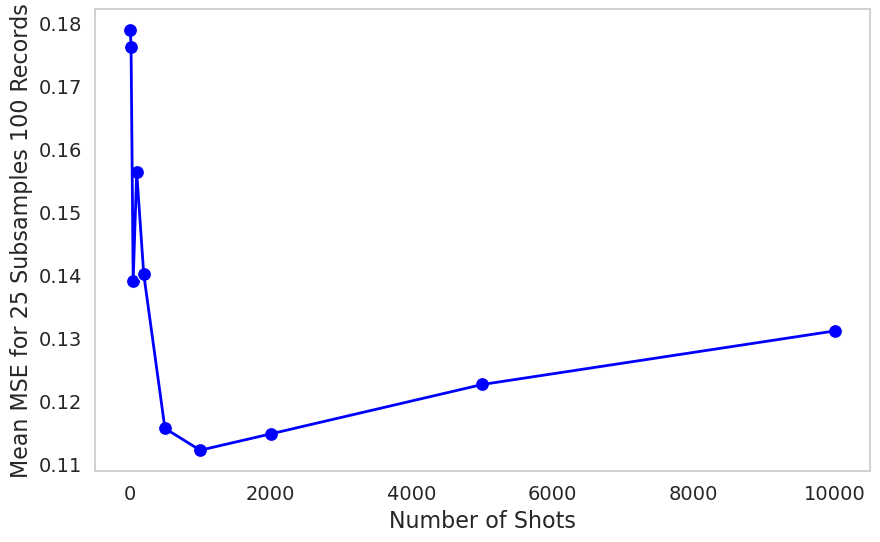

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
data = {
    "X": [10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000],
    "Mean": [0.178837383, 0.176154285, 0.139071074, 0.15631579, 0.140120935, 0.115662631, 0.112190403, 0.114785542, 0.122624878, 0.131127924],
    "Standard Deviation": [0.099455252, 0.125193151, 0.073203023, 0.101092817, 0.096416622, 0.066651984, 0.050175879, 0.072400714, 0.065144322, 0.090576826]
}
df = pd.DataFrame(data)

# Set the pastel theme
sns.set_theme(style="whitegrid", palette="pastel")

# Plot the line graph with error bars
plt.figure(figsize=(10, 6))
sns.lineplot(x="X", y="Mean", data=df,  color="blue", linewidth=2) #label="Mean",
#plt.errorbar(df["X"], df["Mean"], yerr=df["Standard Deviation"], fmt='o', color='blue', ecolor='lightblue', elinewidth=2, capsize=4, label="Standard Deviation")

# Add round data points
sns.scatterplot(x="X", y="Mean", data=df, color="blue", s=100)#, label="Mean")

# Add labels, title, and legend
plt.xlabel('Number of Shots', fontsize=16)
plt.ylabel('Mean MSE for 25 Subsamples 100 Records', fontsize=16)
#plt.title('Curved Line Graph with Error Bars (Seaborn Pastel Theme)', fontsize=14)
#plt.legend(fontsize=12)

# Set font size for axis values
plt.tick_params(axis='both', which='major', labelsize=14)
# Remove gridlines
plt.grid(False)
# Save the plot as PNG and SVG
plt.savefig("numshots_noise_100recs_25samples.png", format="png", dpi=300)
plt.savefig("numshots_noise_100recs_25samples.pdf", format="pdf")

# Show the plot
plt.show()

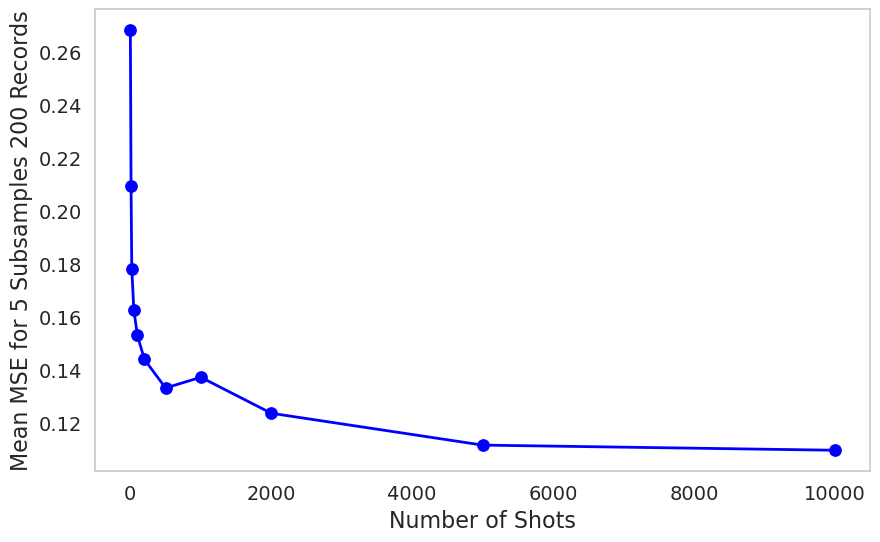

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
data = {
    "X":                  [0, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000],
    "Mean":               [0.268119037, 0.209550392, 0.178231379, 0.162546355, 0.153055317, 0.143964931, 0.133209072, 0.137263304, 0.123691795, 0.11167684, 0.109736031],
    "Standard Deviation": [0.092716676, 0.081442869, 0.07069424, 0.078715949, 0.07085329, 0.053542433, 0.064920003, 0.058695319, 0.067328561, 0.045311367, 0.043560576]
}
df = pd.DataFrame(data)

# Set the pastel theme
sns.set_theme(style="whitegrid", palette="pastel")

# Plot the line graph
plt.figure(figsize=(10, 6))
sns.lineplot(x="X", y="Mean", data=df,  color="blue", linewidth=2) #label="Mean",

# Add round data points
sns.scatterplot(x="X", y="Mean", data=df, color="blue", s=100)# label="Mean")

# Add labels, title, and legend
plt.xlabel('Number of Shots', fontsize=16)
plt.ylabel('Mean MSE for 5 Subsamples 200 Records', fontsize=16)
#plt.legend(fontsize=12)

# Set font size for axis values
plt.tick_params(axis='both', which='major', labelsize=14)

# Remove gridlines
plt.grid(False)

# Save the plot as PNG and PDF
plt.savefig("numshots_noise_200recs_5samples.png", format="png", dpi=300)
plt.savefig("numshots_noise_200recs_5samples.pdf", format="pdf")

# Show the plot
plt.show()

/tmp/ipykernel_2982445/3453524882.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


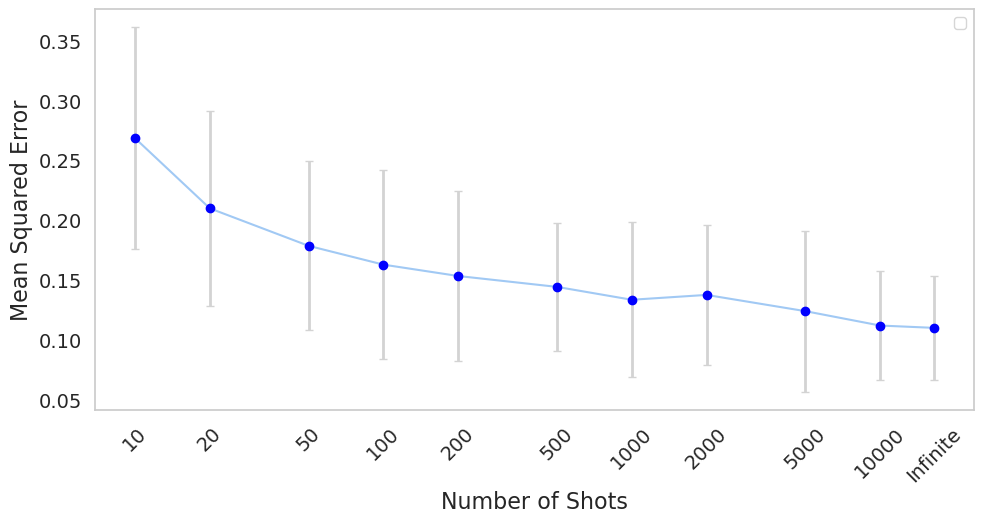

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data
data = {
    "Raw X": [10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, "Infinite"],
    "Y": [0.268119037, 0.209550392, 0.178231379, 0.162546355, 0.153055317, 0.143964931, 0.133209072, 0.137263304, 0.123691795, 0.11167684, 0.109736031],
    "Error": [0.092716676, 0.081442869, 0.07069424, 0.078715949, 0.07085329, 0.053542433, 0.064920003, 0.058695319, 0.067328561, 0.045311367, 0.043560576]
    
    #"Error": [0.01, 0.015, 0.02, 0.01, 0.012, 0.008, 0.02, 0.015, 0.01, 0.005, 0.003]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Replace "Infinite" with a placeholder value for transformation
df["Raw X"] = pd.to_numeric(df["Raw X"], errors="coerce")  # Convert to numeric, NaN for "Infinite"
df["Log X"] = np.log(df["Raw X"])  # Apply natural log transformation (ignores NaN)

# Handle "Infinite" separately
infinite_index = df["Raw X"].isna()  # Identify the row with "Infinite"
if infinite_index.any():
    max_log_x = df["Log X"].max()  # Find the maximum log-transformed value
    df.loc[infinite_index, "Log X"] = max_log_x + 0.5  # Assign a value slightly larger than the max
    df["Raw X"] = df["Raw X"].astype(object)  # Convert to object type to allow "Infinite"
    df.loc[infinite_index, "Raw X"] = "Infinite"  # Restore the label for "Raw X"

# Plot
sns.set(style="whitegrid", palette="pastel")  # Set pastel theme
plt.figure(figsize=(10, 6))

# Plot the line chart without error bars
sns.lineplot(x="Log X", y="Y", data=df, marker="o") #, label="MSE vs # Shots")

# Add custom error bars using Matplotlib
plt.errorbar(df["Log X"], df["Y"], yerr=df["Error"], fmt='o', color='blue', ecolor='lightgray', elinewidth=2, capsize=3)

# Customize x-axis labels to show raw values without decimals and include "Infinite"
formatted_labels = [str(int(x)) if isinstance(x, (int, float)) else x for x in df["Raw X"]]
plt.xticks(ticks=df["Log X"], labels=formatted_labels, rotation=45)

# Set font sizes for labels and tick parameters
plt.xlabel("Number of Shots", fontsize=16)
plt.ylabel("Mean Squared Error", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)

# Remove gridlines
plt.grid(False)

plt.legend()

# Adjust layout to prevent cutoff
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Add extra space at the bottom


# Add title
#plt.title("Line Chart: Y vs Log X (Raw X Labels)", fontsize=16)
# Save the plot as PNG and PDF
plt.savefig("numshots_noise_200recs_5samples.png", format="png", dpi=300)
plt.savefig("numshots_noise_200recs_5samples.pdf", format="pdf")

plt.show()